# Интернет - магазин "В один клик"

## Описание проекта
- Компания продаёт разного рода товары:
    + Косметика
    + Мелкая бытовая техника
    + Игрушки
    + Товары для детей и для дома
    + Продукты
- Отчётность показала, что активность покупателей стала снижаться(привлекать новых клиентов не имеет смысла, большая часть аудитории знает о существовании компании)
- Возможным решением проблемы является разработка персонализированных предложений для клиентов, чтобы удержать их в своём сервисе

## Цель работы
- Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность

## Описание данных

- 1. Файл `market_file.csv` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Описание данных:
     + `id` — номер покупателя в корпоративной базе данных
     + `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»
     + `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт»
     + `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель
     + `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента
     + `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце
     + `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте
     + `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев
     + `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев
     + `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца
     + `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца
     + `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта
     + `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

- 2. Файл `market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Описание данных:
     + `id` — номер покупателя в корпоративной базе данных
     + `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'
     + `Выручка` — сумма выручки за период

- 3. Файл `market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Описание данных:
     + `id` — номер покупателя в корпоративной базе данных
     + `Период` — название периода, во время которого зафиксировано общее время
     + `минут` — значение времени, проведённого на сайте, в минутах

- 4. Файл `money.csv` - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Описание данных:
     + `id` — номер покупателя в корпоративной базе данных
     + `Прибыль` — значение прибыли

## План работы

- Загрузка и изучение данных в датасете
- Предобработка данных (корректировка регистра в названиях столбцов, обработка пропусков, анализ типов данных)
- Исследовательский анализ данных (статистический анализ, построение диаграмм, выводы о полученной информации)
- Объединение таблиц
- Корреляционный анализ признаков в датасете (взаимосвязь между признаками, диаграммы рассеяния, выводы)
- Построение пайплайнов с нужными моделями обучения и гиперпараметрами
- Анализ важности признаков
- Сегментация покупателей
- Общие выводы о проделанной работе

# Шаг 1. Загрузка данных

- Загрузка нужных версий основных библиотек

In [5808]:
!pip install -q scikit-learn
!pip install -q shap
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q phik

In [5809]:
# Библиотеки
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import sklearn # версия 1.4.1.post1
import phik
import shap
#Инструменты из библиотек
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler)
from sklearn.linear_model import (LogisticRegression)
from sklearn.neighbors import KNeighborsClassifier
from phik import phik_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (r2_score,
                             roc_auc_score,
                             confusion_matrix,
                             mean_squared_error,
                             root_mean_squared_error,
                             mean_absolute_error,
                             precision_score,
                             accuracy_score,
                             recall_score
                            )

In [5811]:
# Загрузка данных из датасета market_file.csv
market_file_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')

In [5812]:
market_file_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5813]:
# Загрузка данных из датасета market_money.csv
market_money_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')

In [5814]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5815]:
# Загрузка данных из датасета market_time.csv
market_time_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')

In [5816]:
market_time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [5817]:
# Загрузка данных из датасета money.csv
money_df = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep =';', decimal = ',')

In [5818]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Комментарий
- Загрузка всех необходимых файлов прошла успешно
- Данные в датасетах соответствуют описанию
- На следующем этапе скорректируем названия столбцов, вид данных и прочую информацию в датасетах

# Шаг 2. Предобработка данных

- Реализация функции для поиска уникальных значений

In [5819]:
# Функция цикла
def cycle(df, name_columns, data_name):
    print(data_name)
    for column in name_columns:
        unique_find(df, column)

In [5820]:
def unique_find(df, column):
    print(f"Уникальные значения столбца {column}:")
    print(df[column].sort_values().unique())
    print('')

- Названия столбцов оставим на кириллических символах, без изменений(по условию задания разрешено)

### Проверка типов данных в датасетах

In [5821]:
market_file_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

- Типы данных колонок в датасете `market_file_df` не противоречат здравому смыслу соответствующих столбцов

In [5822]:
market_money_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


- В этом датасете также всё в порядке с типами данных

In [5823]:
market_time_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


- С типами данных в датасете `market_time_df` всё в порядке

In [5824]:
money_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


- Аналогично предыдущим датасетам типы данных у столбцов правильные

- Заметим также то, что в датасетах отсуствуют пропуски

### Проверка датасетов на дубликаты

- Явные дубликаты

In [5825]:
market_file_df.duplicated().sum()

0

In [5826]:
market_money_df.duplicated().sum()

0

In [5827]:
market_time_df.duplicated().sum()

0

In [5828]:
money_df.duplicated().sum()

0

- Явные дубликаты в датасетах отсутствуют

- Неявные дубликаты

- Проверим уникальность столбцов, которые содержат категориальные данные
- Датасет `money_df` нет смысла проверять, так как в нём находятся только количественные данные

In [5829]:
# Названия столбцов для проверки
check_market_file_df = ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
check_market_money_df = ['Период']
check_market_time = ['Период']

In [5830]:
# Проверка датасетов на уникальность значений в ключевых столбцах
cycle(market_file_df, check_market_file_df, 'check_market_file_df')
cycle(market_money_df, check_market_money_df, 'check_market_money_df')
cycle(market_time_df, check_market_time, 'check_market_time')

check_market_file_df
Уникальные значения столбца Покупательская активность:
['Прежний уровень' 'Снизилась']

Уникальные значения столбца Тип сервиса:
['премиум' 'стандарт' 'стандартт']

Уникальные значения столбца Разрешить сообщать:
['да' 'нет']

Уникальные значения столбца Популярная_категория:
['Домашний текстиль' 'Косметика и аксесуары' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника' 'Техника для красоты и здоровья'
 'Товары для детей']

check_market_money_df
Уникальные значения столбца Период:
['предыдущий_месяц' 'препредыдущий_месяц' 'текущий_месяц']

check_market_time
Уникальные значения столбца Период:
['предыдцщий_месяц' 'текущий_месяц']



- В столбце `Тип сервиса` датасета `market_file_df` присутствует неявный дубликат из - за неправильного написания : "стандарт" и "стандартт"
- Данное замечение не относится к анализу неявных дубликатов, но оно впоследствии может создать проблемы при соединении таблиц. В датасете `check_market_time`неправильное написание значения "предыдущий_месяц"("предыдцщий_месяц")

In [5831]:
market_file_df['Тип сервиса'] = market_file_df['Тип сервиса'].replace({'стандартт' : 'стандарт'})
market_time_df['Период'] = market_time_df['Период'].replace({'предыдцщий_месяц' : 'предыдущий_месяц'})
market_file_df['Популярная_категория'] = market_file_df['Популярная_категория'].replace({'Косметика и аксесуары' : 'Косметика и аксессуары'})

- Проверка исправленных значений

In [5832]:
cycle(market_file_df, check_market_file_df, 'check_market_file_df')
cycle(market_money_df, check_market_money_df, 'check_market_money_df')
cycle(market_time_df, check_market_time, 'check_market_time')

check_market_file_df
Уникальные значения столбца Покупательская активность:
['Прежний уровень' 'Снизилась']

Уникальные значения столбца Тип сервиса:
['премиум' 'стандарт']

Уникальные значения столбца Разрешить сообщать:
['да' 'нет']

Уникальные значения столбца Популярная_категория:
['Домашний текстиль' 'Косметика и аксессуары' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника' 'Техника для красоты и здоровья'
 'Товары для детей']

check_market_money_df
Уникальные значения столбца Период:
['предыдущий_месяц' 'препредыдущий_месяц' 'текущий_месяц']

check_market_time
Уникальные значения столбца Период:
['предыдущий_месяц' 'текущий_месяц']



- Проверим теперь ещё раз дубликаты в датасете `market_file_df`

In [5833]:
market_file_df.duplicated().sum()

0

- Дубликатов не найдено

### Приведение названий столбцов датасетов к нижнему регистру

In [5834]:
market_file_df.columns = market_file_df.columns.str.lower()
market_file_df.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5835]:
market_money_df.columns = market_money_df.columns.str.lower()
market_money_df.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5836]:
market_time_df.columns = market_time_df.columns.str.lower()
market_time_df.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [5837]:
money_df.columns = money_df.columns.str.lower()
money_df.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Комментарий по предобработке
- Пропусков в датасетах не найдено
- Названия столбцов оставил на кириллических символах
- Дубликатов также не найдено
- Исправил недочёты в написании значений столбцов

# Шаг 3. Исследовательский анализ данных

## Визуализация данных

- Распределим данные каждого из датасетов на категориальные и количественные, чтобы построить для них правильные графики и диаграммы

- Датасет `market_file_df`:
    + Категориальные: `покупательская активность`, `тип сервиса`, `разрешить сообщать`, `популярная_категория`
    + Количественные: `маркет_актив_6_мес`, `маркет_актив_тек_мес`, `длительность`, `акционные_покупки`, `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `ошибка_сервиса`, `страниц_за_визит`
- Датасет `market_money_df`:
    + Категориальные: `период`
    + Количественные: `выручка`
- Датасет `market_time_df`:
    + Категориальные: `период`
    + Количественные: `минут`
- Датасет `money_df`:
    + Категориальные: отсутствуют
    + Количественные: `прибыль`

- Блок функций, используемых для визуализации данных

In [5838]:
# Функиця для построения круговых диаграмм
def pie_build(df, column, support_column, title, i, j):
    df_column = df.pivot_table(index = column, values = support_column, aggfunc = ['count'])
    df_column.columns = ['quantity']
    df_column['quantity'] = df_column['quantity'] / df[column].count()
    axes[i, j].set_title(title);
    axes[i, j].pie(df_column['quantity'], autopct='%1.2f%%');
    axes[i, j].legend(
    bbox_to_anchor = (1.0, 1.0),
    loc = 'upper left', labels = df_column.index);

In [5839]:
# Функиця для построения одной круговой диаграммы
def pie_build_one(df, column, support_column, title):    
    df_column = df.pivot_table(index = column, values = support_column, aggfunc = ['count'])
    df_column.columns = ['quantity']
    df_column['quantity'] = df_column['quantity'] / df[column].count()
    ax.set_title(title);
    ax.pie(df_column['quantity'], autopct='%1.2f%%');
    ax.legend(
    bbox_to_anchor = (1.0, 1.0),
    loc = 'upper left', labels = df_column.index);

In [5840]:
# функция для построения гистограмм
def hist_build(df, column, hist_color, xlabel, ylabel, title, i, j, quant_of_bins, more_than_one_row):
    if more_than_one_row:
        axes[i, j].set_title(title) 
        axes[i, j].hist(df[column], bins = quant_of_bins, color = hist_color)
        axes[i, j].set_xlabel(xlabel)
        axes[i, j].set_ylabel(ylabel)
    else:
        axes[j].set_title(title) 
        axes[j].hist(df[column], bins = quant_of_bins, color = hist_color)
        axes[j].set_xlabel(xlabel)
        axes[j].set_ylabel(ylabel)      

In [5841]:
# функция для построения одной гистограммы
def hist_build_one(df, column, hist_color, xlabel, ylabel, title, quant_of_bins):
        ax.set_title(title) 
        ax.hist(df[column], bins = quant_of_bins, color = hist_color)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

In [5842]:
# Функция для построения ящиков с усами
def boxplot_build(df, column, xlabel, title, i, left_lim, right_lim):
    axes[i].boxplot(df[[column]], vert = False)
    axes[i].set_title(title) 
    axes[i].set_xlabel(xlabel)
    axes[i].set_xlim(left_lim, right_lim)

In [5843]:
# Функция для построения ящиков с усами
def boxplot_build_one(df, column, xlabel, title, left_lim, right_lim):
    ax.boxplot(df[[column]], vert = False)
    ax.set_title(title) 
    ax.set_xlabel(xlabel)
    ax.set_xlim(left_lim, right_lim)

## Датасет `market_file_df`

- Категориальные данные

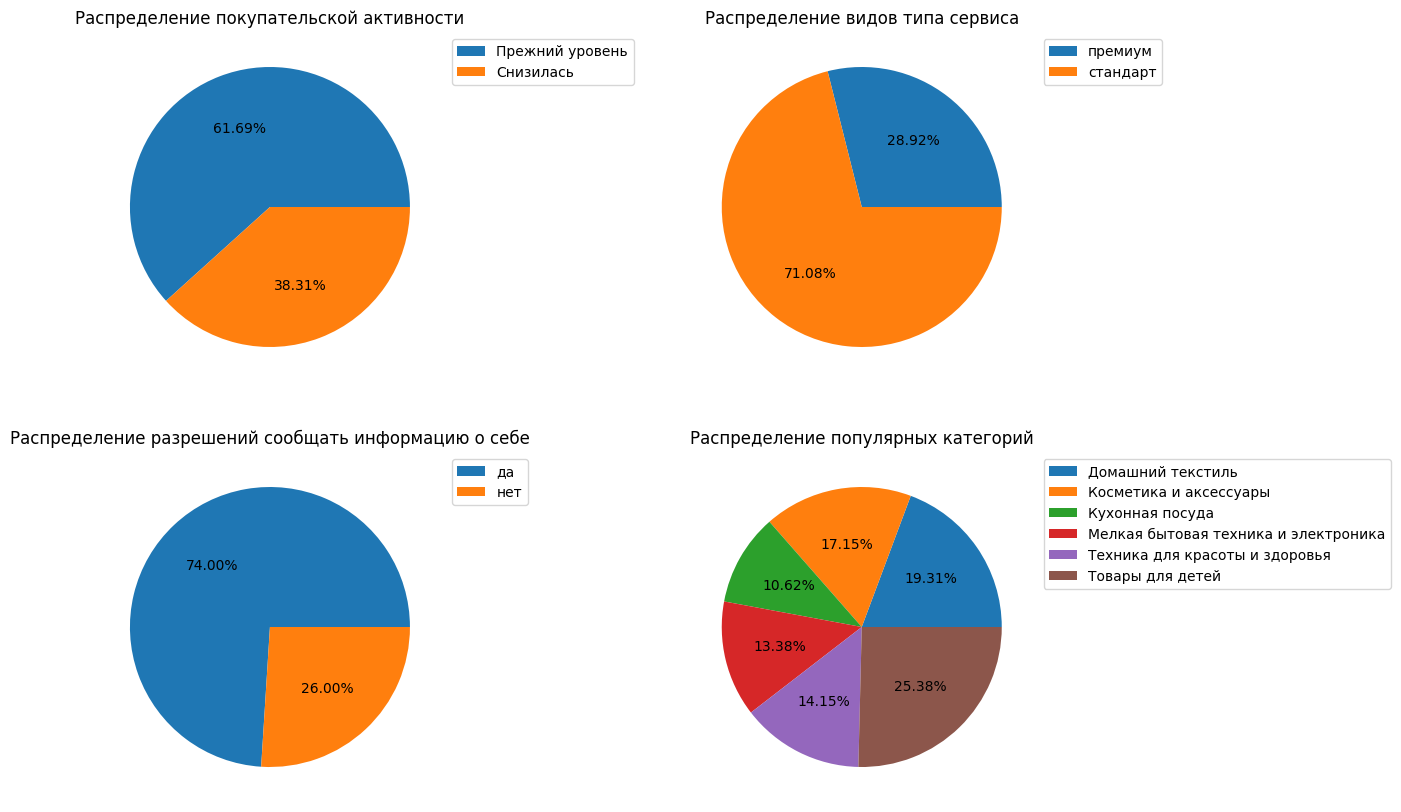

In [5844]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
pie_build(market_file_df, 'покупательская активность', 'id', 'Распределение покупательской активности', 0, 0)
pie_build(market_file_df, 'тип сервиса', 'id', 'Распределение видов типа сервиса', 0, 1)
pie_build(market_file_df, 'разрешить сообщать', 'id', 'Распределение разрешений сообщать информацию о себе', 1, 0)
pie_build(market_file_df, 'популярная_категория', 'id', 'Распределение популярных категорий', 1, 1)

- Количественные данные

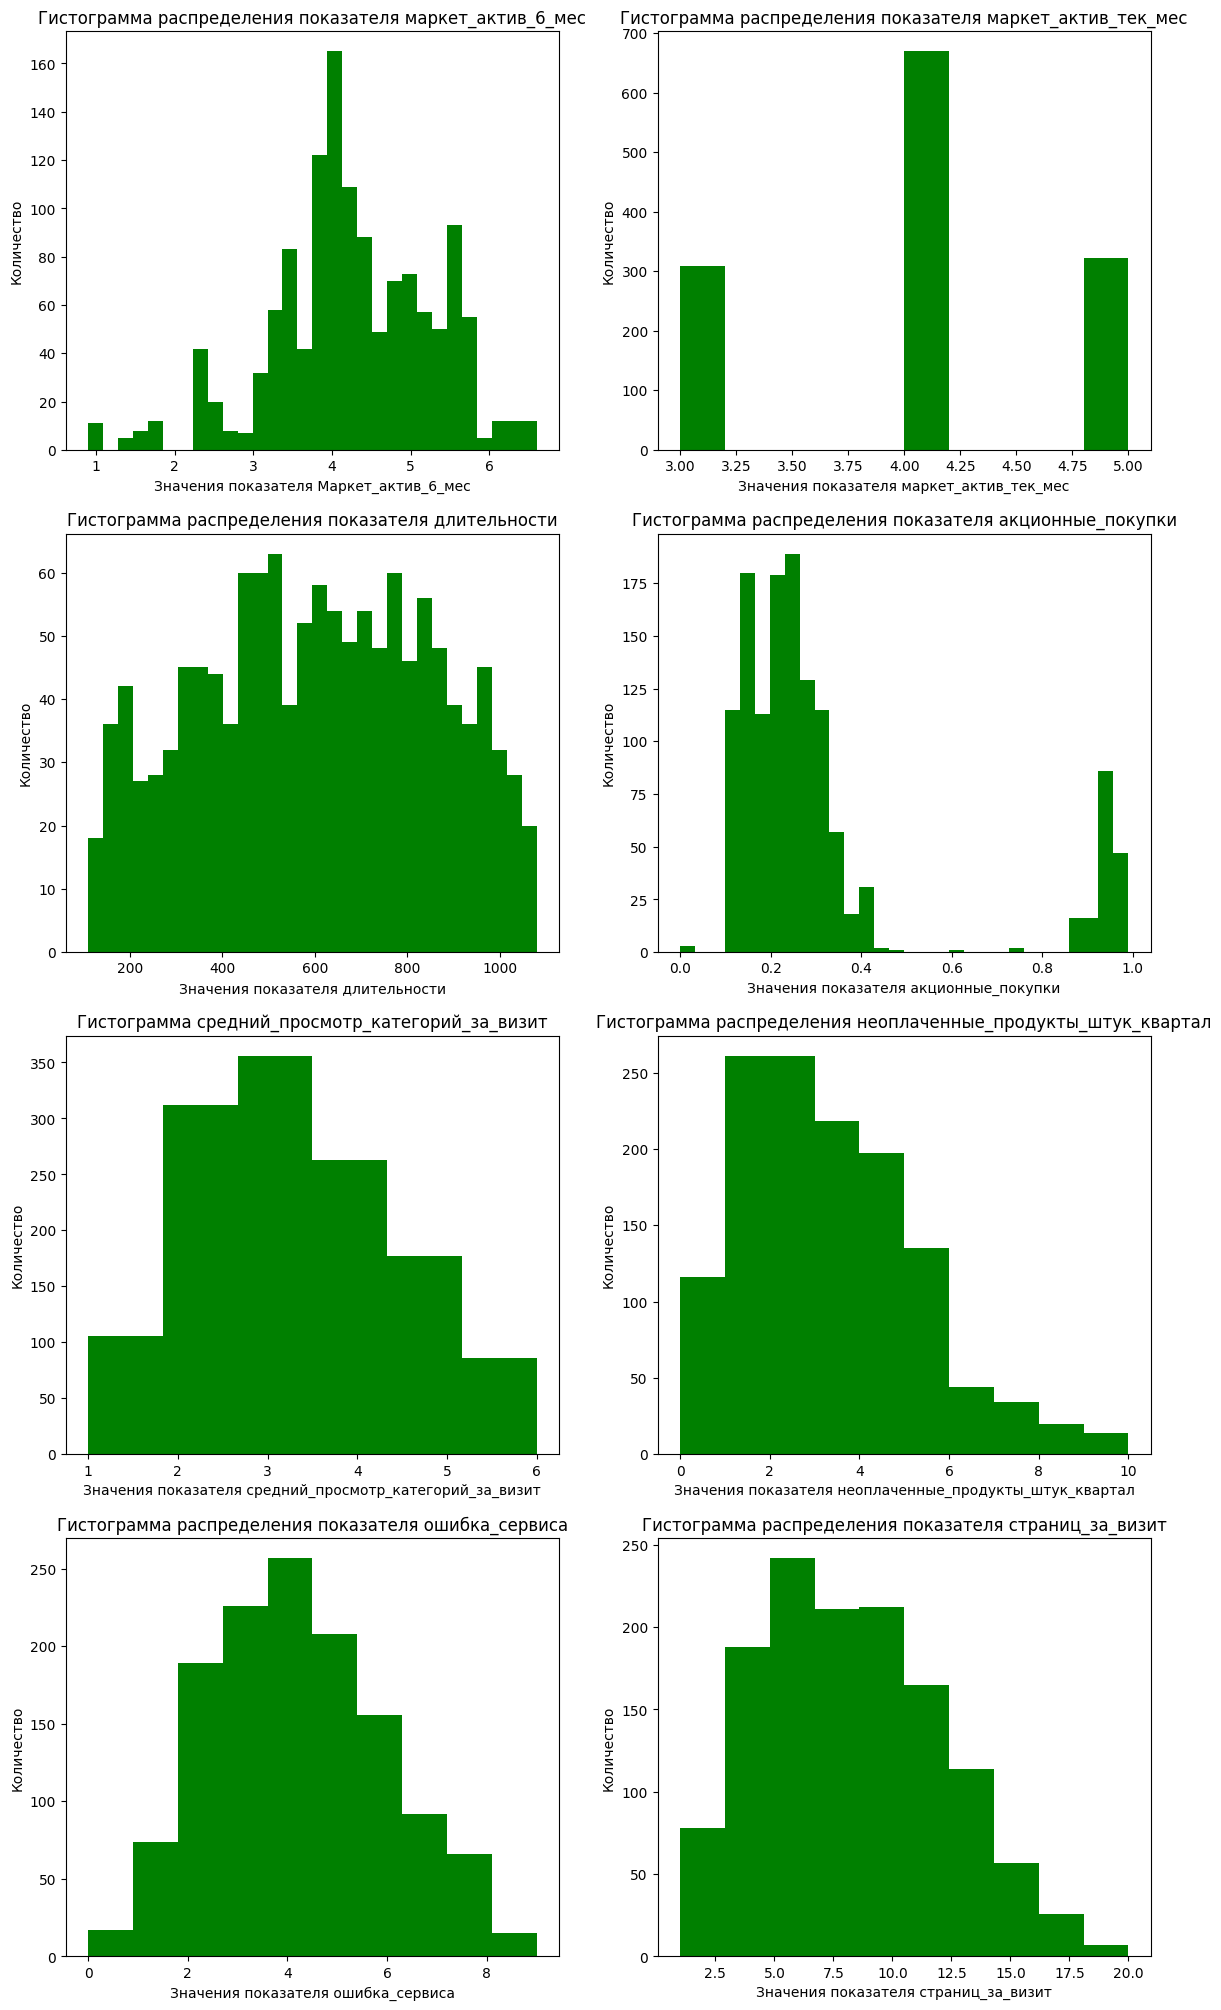

In [5845]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 25))
hist_build(market_file_df,
           'маркет_актив_6_мес',
           'green',
           'Значения показателя Маркет_актив_6_мес',
           'Количество',
           'Гистограмма распределения показателя маркет_актив_6_мес', 0, 0, 30, True)

hist_build(market_file_df,
           'маркет_актив_тек_мес',
           'green',
           'Значения показателя маркет_актив_тек_мес',
           'Количество',
           'Гистограмма распределения показателя маркет_актив_тек_мес', 0, 1, 10, True) 

hist_build(market_file_df,
           'длительность',
           'green',
           'Значения показателя длительности',
           'Количество',
           'Гистограмма распределения показателя длительности', 1, 0, 30, True)

hist_build(market_file_df,
           'акционные_покупки',
           'green',
           'Значения показателя акционные_покупки',
           'Количество',
           'Гистограмма распределения показателя акционные_покупки', 1, 1, 30, True)

hist_build(market_file_df,
           'средний_просмотр_категорий_за_визит',
           'green',
           'Значения показателя средний_просмотр_категорий_за_визит',
           'Количество',
           'Гистограмма средний_просмотр_категорий_за_визит', 2, 0, 6, True)

hist_build(market_file_df,
           'неоплаченные_продукты_штук_квартал',
           'green',
           'Значения показателя неоплаченные_продукты_штук_квартал',
           'Количество',
           'Гистограмма распределения неоплаченные_продукты_штук_квартал', 2, 1, 10, True)

hist_build(market_file_df,
           'ошибка_сервиса',
           'green',
           'Значения показателя ошибка_сервиса',
           'Количество',
           'Гистограмма распределения показателя ошибка_сервиса', 3, 0, 10, True)

hist_build(market_file_df,
           'страниц_за_визит',
           'green',
           'Значения показателя страниц_за_визит',
           'Количество',
           'Гистограмма распределения показателя страниц_за_визит', 3, 1, 10, True)

- Выводы:
    + Показатели `ошибка сервиса`, `средний_просмотр_категорий_за_визит`, `длительность`, `маркет_актив_6_мес` обладают нормальным распределением
    + Для показателей `страниц_за_визит`, `неоплаченные_продукты_штук_квартал` характерно нормальное распределение со смещением влево
    + `маркет_актив_тек_мес` принимает целые значения от 3 до 5.(Значения 4 встречаются в 2 раза чаще, чем 3 и 5, в то время как последние два примерно одинаково)
    + Распределение показателя `акционные_покупки` имеет специфический вид. Данные принимают значения от 0 до 1. Видно скопление данных на промежутке от 0.1 до 0.45, а также от 0.85 до 0.95
    + Аномалий в данных не наблюадется исходя из данных, в то время как выбросы предстоит отыскать на диаграмме ящиков с усами
    + Касаемо графиков для категориальных данных вся информация визуализирована, комментарии будут лишь повторять то, что изображено на круговых диаграммах

- Диаграммы ящиков с усами для столбцов `Средний_просмотр_категорий_за_визит`, `Ошибка сервиса`

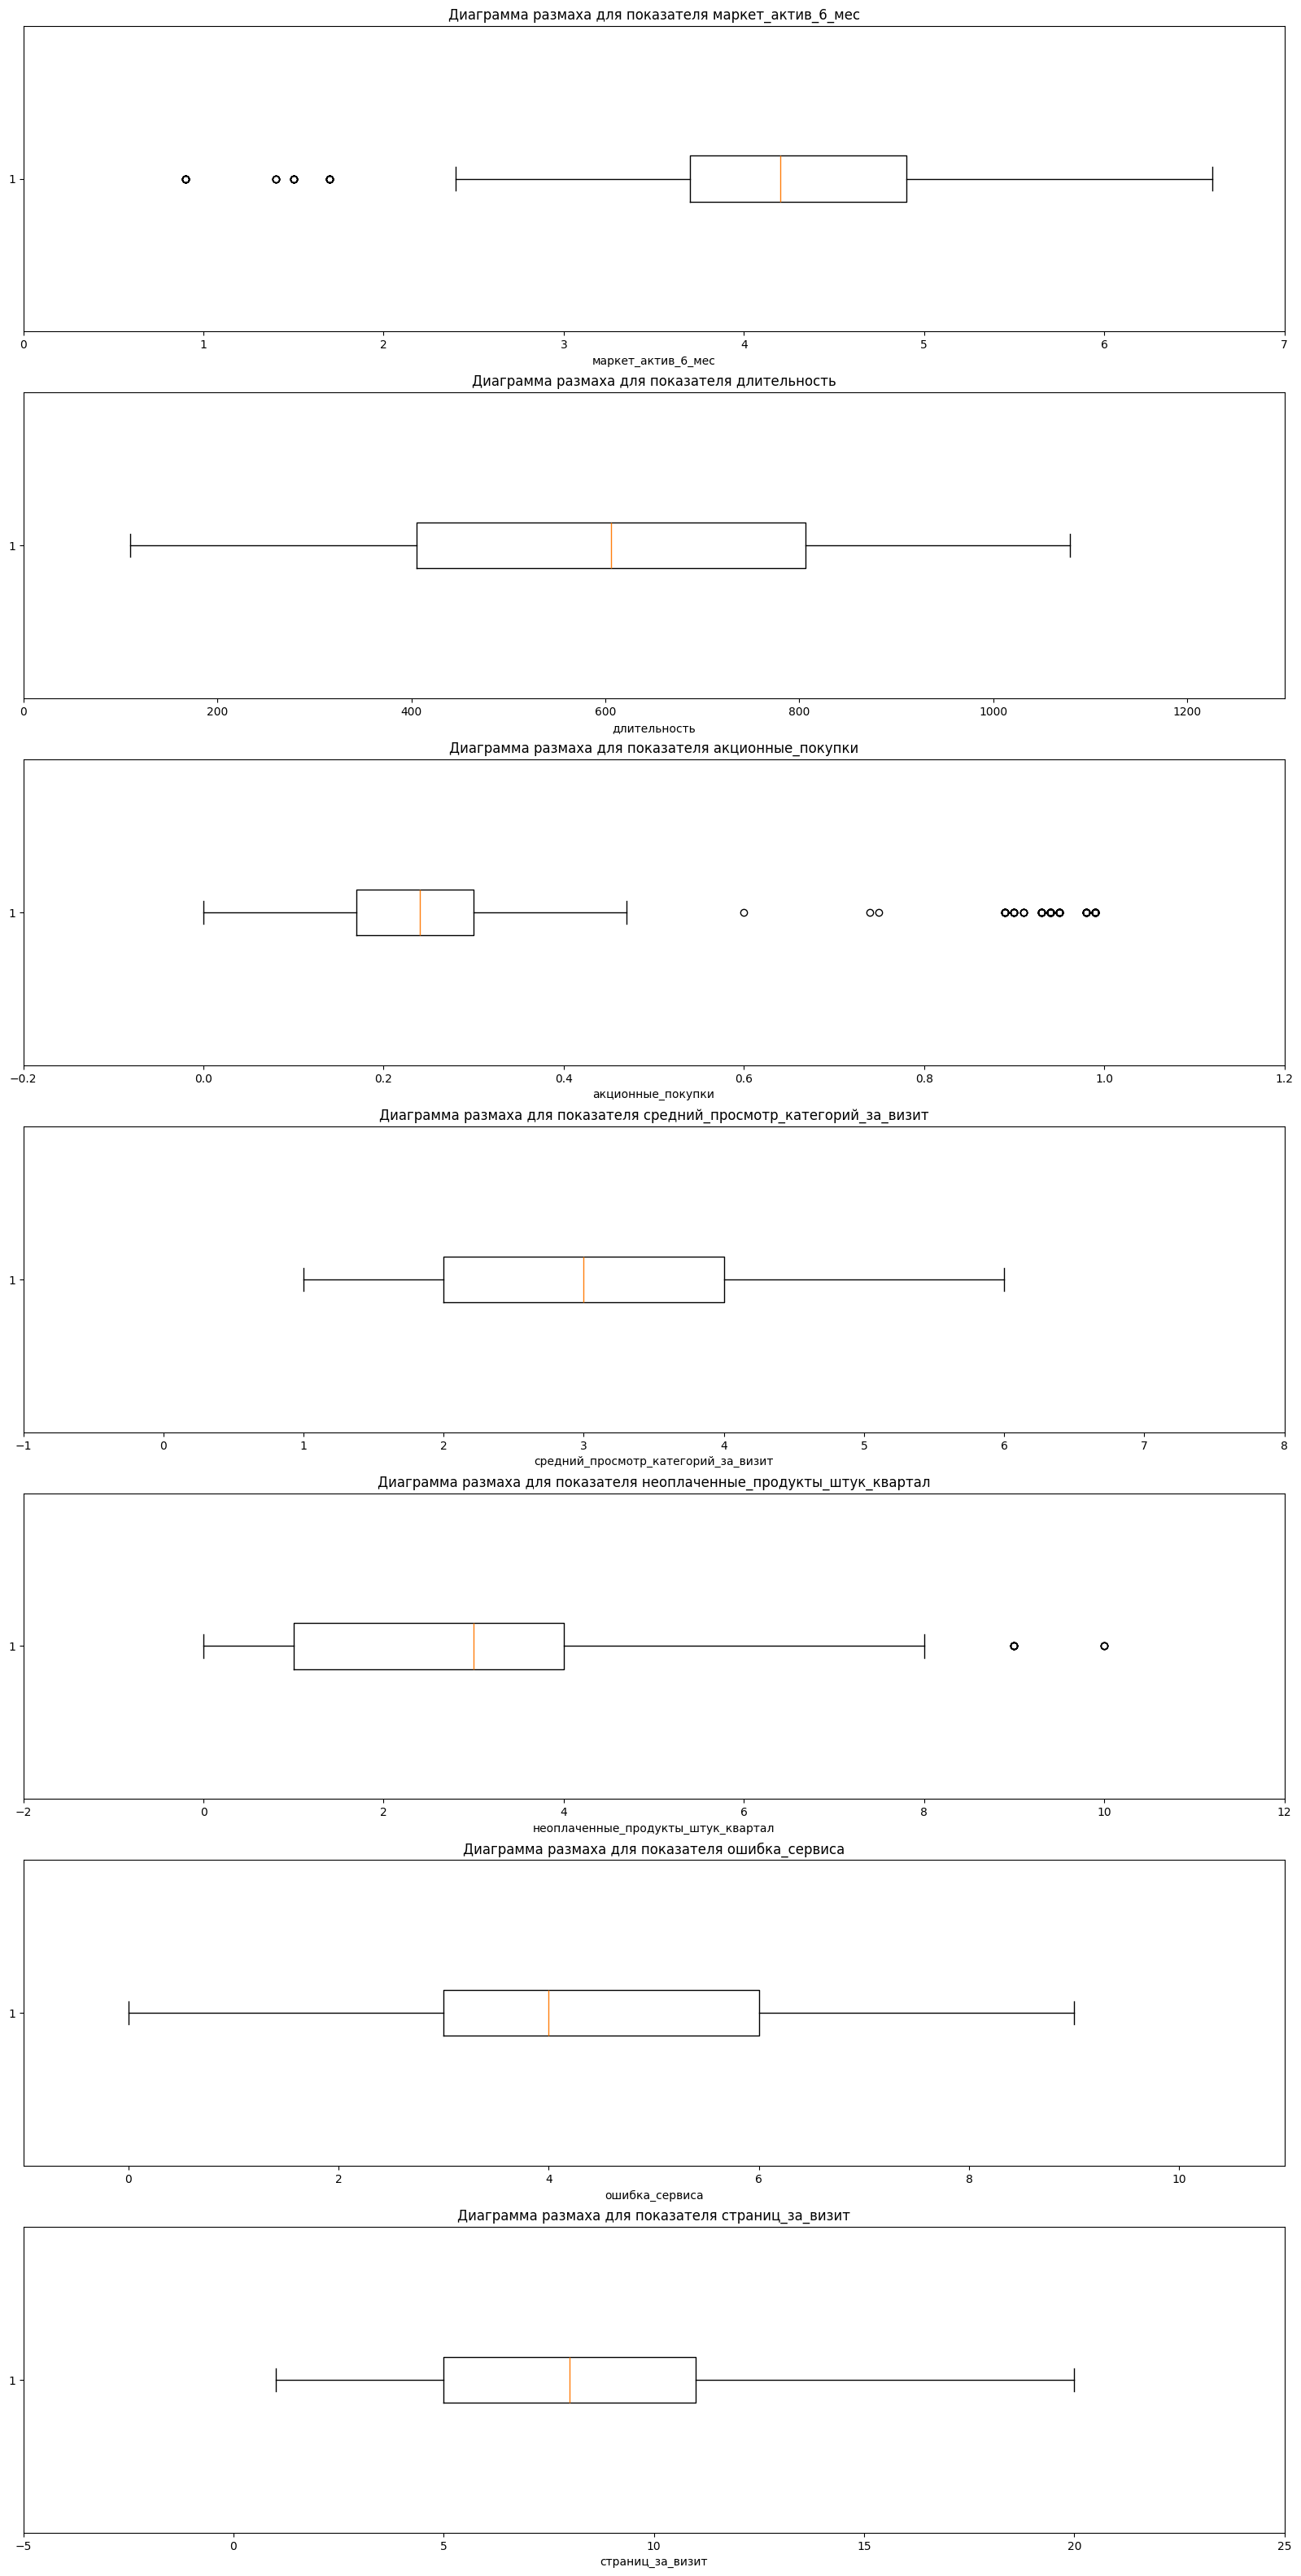

In [5846]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 40))
boxplot_build(market_file_df, 'маркет_актив_6_мес', 'маркет_актив_6_мес', 'Диаграмма размаха для показателя маркет_актив_6_мес', 0, 0, 7)
boxplot_build(market_file_df, 'длительность', 'длительность', 'Диаграмма размаха для показателя длительность', 1, 0, 1300)
boxplot_build(market_file_df, 'акционные_покупки', 'акционные_покупки', 'Диаграмма размаха для показателя акционные_покупки', 2, -0.2, 1.2)
boxplot_build(market_file_df,
              'средний_просмотр_категорий_за_визит',
              'средний_просмотр_категорий_за_визит',
              'Диаграмма размаха для показателя средний_просмотр_категорий_за_визит',
              3, -1, 8)
boxplot_build(market_file_df,
              'неоплаченные_продукты_штук_квартал',
              'неоплаченные_продукты_штук_квартал',
              'Диаграмма размаха для показателя неоплаченные_продукты_штук_квартал', 4, -2, 12)
boxplot_build(market_file_df,'ошибка_сервиса', 'ошибка_сервиса', 'Диаграмма размаха для показателя ошибка_сервиса', 5, -1, 11)
boxplot_build(market_file_df,'страниц_за_визит', 'страниц_за_визит', 'Диаграмма размаха для показателя страниц_за_визит', 6, -5, 25)


- Только в столбце `акционные_покупки` присутствует большое количество выбросов, но удалять их нецелесообразно, так как с учётом распределения на гистограммах проще его преобразовать в категориальный признак в зависимости оттого, какому интервалу будет принадлежать значение

## Датасет `market_money_df`

- Категориальные данные

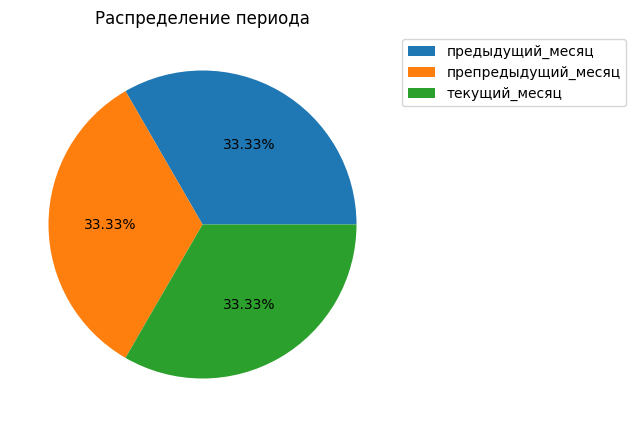

In [5847]:
fig, ax = plt.subplots(figsize = (5, 5))
pie_build_one(market_money_df, 'период', 'id', 'Распределение периода')

- Количественные данные

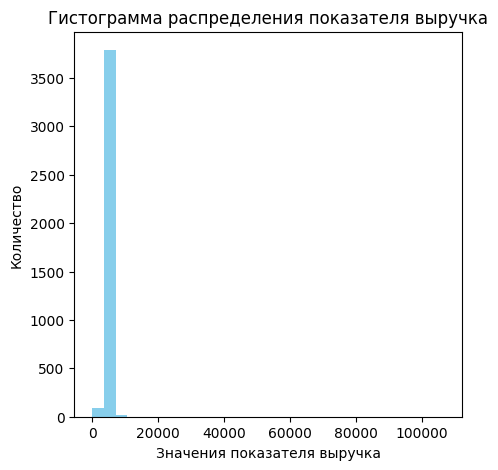

In [5848]:
fig, ax = plt.subplots(figsize = (5, 5))
hist_build_one(market_money_df,
           'выручка',
           'skyblue',
           'Значения показателя выручка',
           'Количество',
           'Гистограмма распределения показателя выручка', 30)

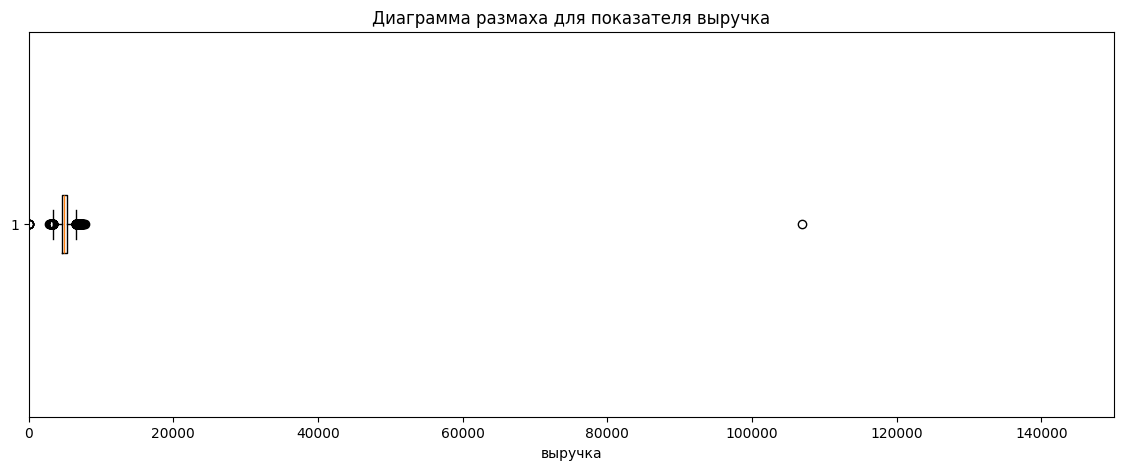

In [5849]:
fig, ax = plt.subplots(figsize = (14, 5))
boxplot_build_one(market_money_df, 'выручка', 'выручка', 'Диаграмма размаха для показателя выручка', 0, 150000)

- По диаграммам видно, что есть выброс с выручкой более чем 100 тыс. Если забегать вперёд, то при объединении таблиц необходимо отдельно учитывать информацию о каждом периоде. В таком случае для данного клиента будет отсутствовать информация за тот месяц(если удалить данную запись), когда он совершил покупок на более чем 100 тыс. Поэтому будет правильнее заменить данный выброс на среднее значение покупок за остальные 2 месяца у этого клиента

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

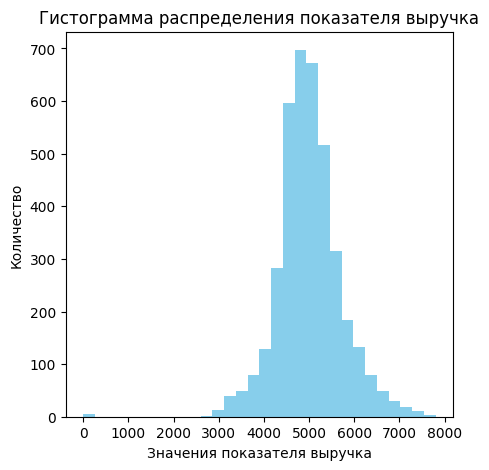

In [5850]:
id_out = market_money_df.loc[market_money_df['выручка'] > 100000]['id'].tolist()
id_out
mean_of_id_out = market_money_df[(market_money_df['id'] == id_out[0]) & (market_money_df['выручка'] < 100000)]['выручка'].mean()
market_money_df['выручка'] = market_money_df['выручка'].apply(lambda x : mean_of_id_out if (x > 100000) else x)
fig, ax = plt.subplots(figsize = (5, 5))
hist_build_one(market_money_df,
           'выручка',
           'skyblue',
           'Значения показателя выручка',
           'Количество',
           'Гистограмма распределения показателя выручка', 30)

- Код для поставленной задачи работает только для одного клиента(костыльный способ). Хочу узнать, как сделать так, чтобы эта идея работала для более чем одного случая

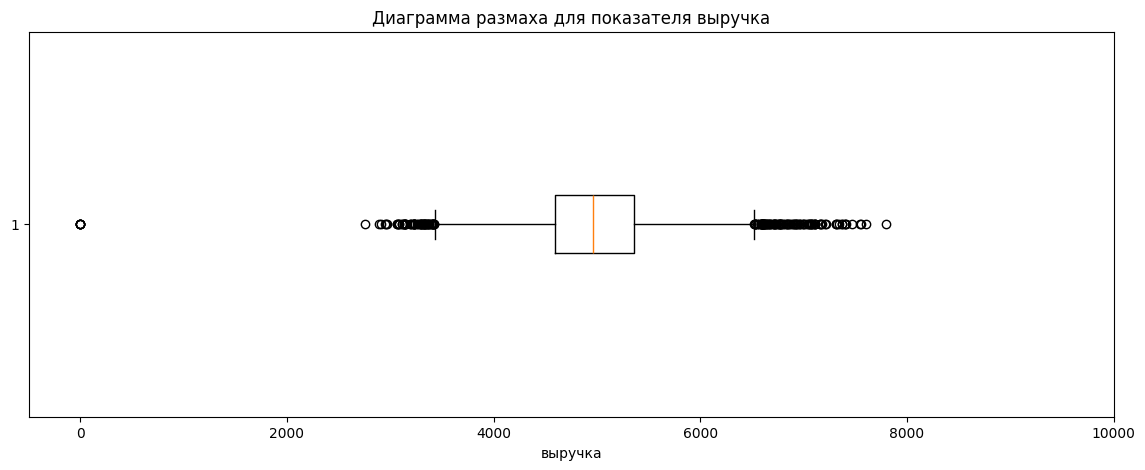

In [5851]:
fig, ax = plt.subplots(figsize = (14, 5))
boxplot_build_one(market_money_df, 'выручка', 'выручка', 'Диаграмма размаха для показателя выручка', -500, 10000)

- Значения выручки распределены нормально

In [5852]:
market_money_df['выручка'].describe()

count    3900.000000
mean     4999.722154
std       706.966984
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

## Датасет `market_time_df`

- Категориальные данные

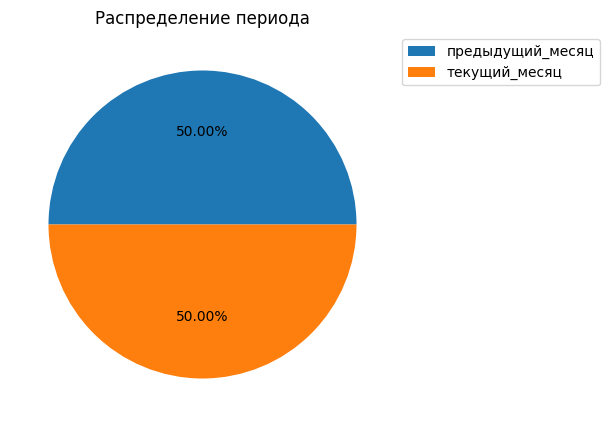

In [5853]:
fig, ax = plt.subplots(figsize = (5, 5))
pie_build_one(market_time_df, 'период', 'id', 'Распределение периода')

- Количественные данные

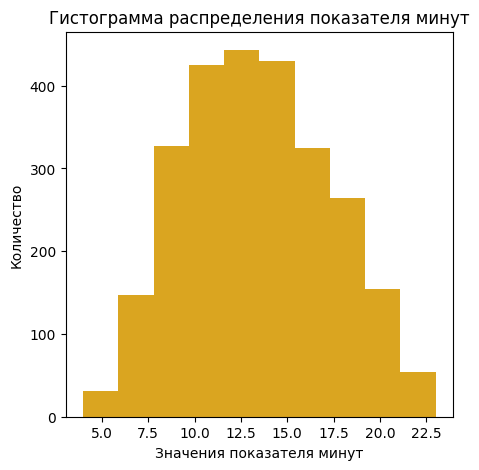

In [5854]:
fig, ax = plt.subplots(figsize = (5, 5))
hist_build_one(market_time_df,
           'минут',
           'goldenrod',
           'Значения показателя минут',
           'Количество',
           'Гистограмма распределения показателя минут', 10)

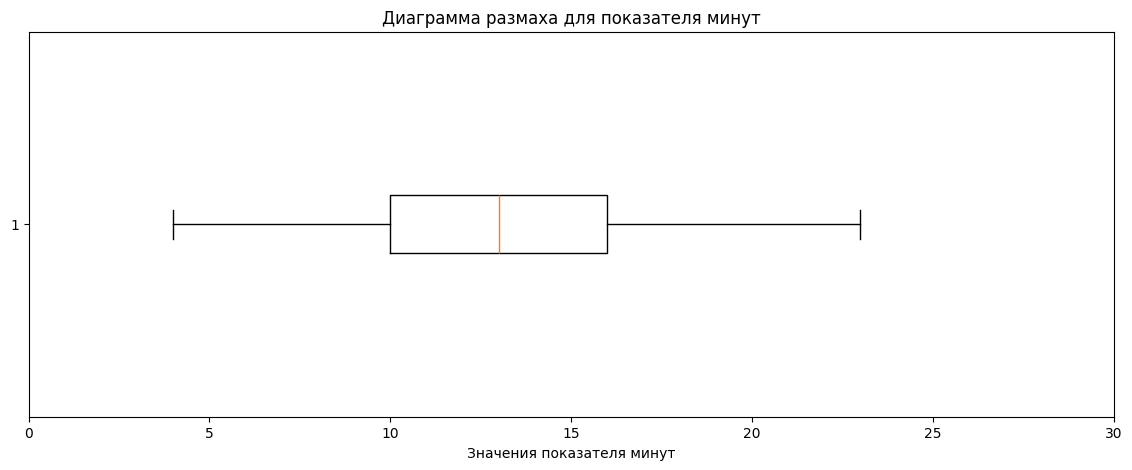

In [5855]:
fig, ax = plt.subplots(figsize = (14, 5))
boxplot_build_one(market_time_df, 'минут', 'Значения показателя минут', 'Диаграмма размаха для показателя минут', 0, 30)

In [5856]:
market_time_df['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

- В датасете `market_time_df` с данными всё в порядке
- Значения `минут` распредлены нормально

## Датасет `money_df`

- Количественные данные

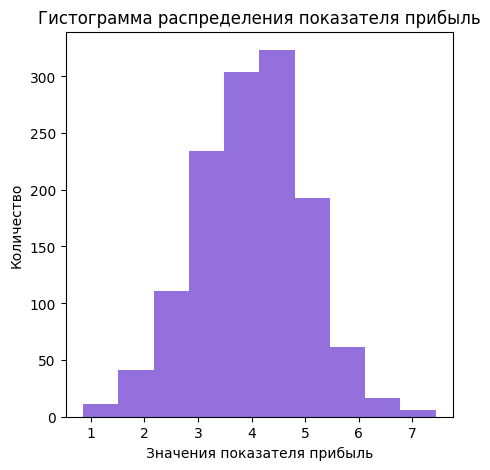

In [5857]:
fig, ax = plt.subplots(figsize = (5, 5))
hist_build_one(money_df,
           'прибыль',
           'mediumpurple',
           'Значения показателя прибыль',
           'Количество',
           'Гистограмма распределения показателя прибыль', 10)

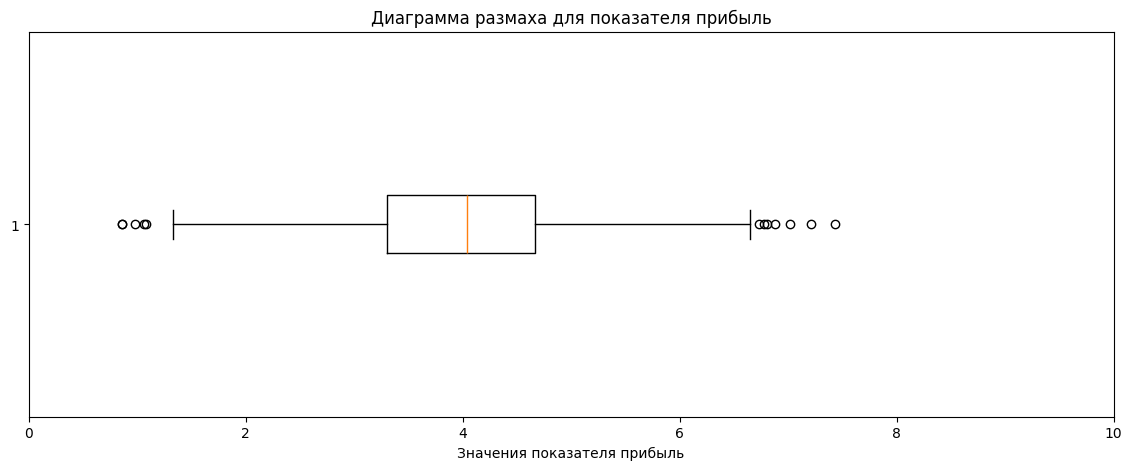

In [5858]:
fig, ax = plt.subplots(figsize = (14, 5))
boxplot_build_one(money_df, 'прибыль', 'Значения показателя прибыль', 'Диаграмма размаха для показателя прибыль', 0, 10)

- На диаграмме ящика с усами присутствуют значения, которые отмечены как выбросы. Но они не так далеко располагаются от границ нижнего и верхнего квартилей, поэтому удалить эти данные не стоит
- Данные в этом столбце распредлены также нормально, возможно с небольшим смещением(но это не критично)

## Выбор клиентов с покупательской активностью не менее трёх месяцев

- По условию задания это люди, которые совершили хотя бы одну покупку в течение последних трёх месяцев
- Сделаем выборку клиентов, у которых не было покупок хотя бы в одном месяце за указанный период, и удалим их из датасета. Все остальные будут удовлетворять требованию

In [5859]:
list_to_delete = market_money_df.loc[(market_money_df['выручка'] == 0)]['id']
list_to_delete = list_to_delete.unique().tolist()
list_to_delete

[215348, 215357, 215359]

- Найдено 3 клиента с нулевой выручкой хотя бы в один месяц за указанный период. Удалим записи о них из всех датасетов

In [5860]:
market_file_df = market_file_df.loc[~market_file_df['id'].isin(list_to_delete)]
market_money_df = market_money_df.loc[~market_money_df['id'].isin(list_to_delete)]
market_time_df = market_time_df.loc[~market_time_df['id'].isin(list_to_delete)]
money_df = money_df.loc[~money_df['id'].isin(list_to_delete)]

In [5861]:
market_file_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская активность            1297 non-null   object 
 2   тип сервиса                          1297 non-null   object 
 3   разрешить сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                     

In [5862]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


In [5863]:
market_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2594 entries, 2 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2594 non-null   int64 
 1   период  2594 non-null   object
 2   минут   2594 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.1+ KB


In [5864]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1297 non-null   int64  
 1   прибыль  1297 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.4 KB


- Информация о вышеуказанных пользователях была удалена

### Выводы по исследовательскому анализу данных:

- Выбросов в данных практически нет. Только один клиент, который совершил за месяц покупок более чем на 100 тыс. Значение за этот месяц было заменено на среднее выручки за другие 2 месяца
- После удаления выбросов виды распределения данных практически у всех столбцов принимают нормальный(где - то присутствует небольшое смещение). Также есть столбцы, в которых данные распределены дискретно. Подробнее обо всём написано в комментариях к диаграммам
- По критерию покупательской способности было удалено 3 клиента, и информация о них из остальных датасетов

# Шаг 4. Объединение таблиц

- По условию задания информацию о показателях за периоды в итоговом датасете необходимо сохранить. Поэтому перед объединением создадим сводные таблицы датасетов `market_money_df` и `market_time_df` по значению столбца `период` 

### Объединение с датасетом `market_money_df`

In [5865]:
market_money_df_to_merge = market_money_df.pivot_table(index = 'id', columns = 'период', values = 'выручка')
market_money_df_to_merge.head()

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


In [5866]:
# Переименуем названия столбцов
new_name = {
                'предыдущий_месяц' : 'выручка_пред_месяц',
                'препредыдущий_месяц' : 'выручка_препред_месяц',
                'текущий_месяц' : 'выручка_тек_месяц'
           }

In [5867]:
market_money_df_to_merge = market_money_df_to_merge.rename(columns = new_name)

In [5868]:
market_money_df_to_merge.head()

период,выручка_пред_месяц,выручка_препред_месяц,выручка_тек_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


In [5869]:
df = market_file_df.merge(market_money_df_to_merge, on = 'id', how = 'left')
df.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред_месяц,выручка_препред_месяц,выручка_тек_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5


### Объединение с датасетом `market_time_df`

In [5870]:
market_time_df_to_merge = market_time_df.pivot_table(index = 'id', columns = 'период', values = 'минут')
market_time_df_to_merge.head()

период,предыдущий_месяц,текущий_месяц
id,,
215349,12.0,10.0
215350,8.0,13.0
215351,11.0,13.0
215352,8.0,11.0
215353,10.0,10.0


In [5871]:
# Переименуем названия столбцов
new_name = {
                'предыдущий_месяц' : 'минут_пред_месяц',
                'текущий_месяц' : 'минут_тек_месяц'
           }

In [5872]:
market_time_df_to_merge = market_time_df_to_merge.rename(columns = new_name)
market_time_df_to_merge.head()

период,минут_пред_месяц,минут_тек_месяц
id,,
215349,12.0,10.0
215350,8.0,13.0
215351,11.0,13.0
215352,8.0,11.0
215353,10.0,10.0


In [5873]:
df = df.merge(market_time_df_to_merge, on = 'id', how = 'left')
df.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред_месяц,выручка_препред_месяц,выручка_тек_месяц,минут_пред_месяц,минут_тек_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12.0,10.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8.0,13.0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11.0,13.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8.0,11.0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10.0,10.0


- Проверим новый датасет на пропуски

In [5874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская активность            1297 non-null   object 
 2   тип сервиса                          1297 non-null   object 
 3   разрешить сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

- Пропуски в датасете отсутствуют. Единственный недочёт: тип данных столбцов с информацией о том, сколько времени провёл клиент на сайте, после объединения сменился с int на float

In [5875]:
df[['минут_тек_месяц']] = df[['минут_тек_месяц']].astype('int64')
df[['минут_пред_месяц']] = df[['минут_пред_месяц']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская активность            1297 non-null   object 
 2   тип сервиса                          1297 non-null   object 
 3   разрешить сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

- Данные корректно объединены

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

# Шаг 5. Корреляционный анализ

- Построим матрицу корреляции при помощи библиотеки phik, так как в датасете присутствуют кроме количественных категориальные данные

In [5876]:
# Укажем количественные данные, чтобы корреляция между этими признаками правильно рассчитывалась
interval_cols = [
                    'маркет_актив_6_мес',
                    'маркет_актив_тек_мес',
                    'длительность',
                    'акционные_покупки',
                    'средний_просмотр_категорий_за_визит',
                    'неоплаченные_продукты_штук_квартал',
                    'ошибка_сервиса',
                    'страниц_за_визит',
                    'выручка_пред_месяц',
                    'выручка_препред_месяц',
                    'выручка_тек_месяц',
                    'минут_пред_месяц',
                    'минут_тек_месяц'
                   ]

- Добавим признак `акционные_покупки_бинар`, присвоив значение 1 тем, у кого значение данного показателя более 0.5, и 0 в противном случае

In [5877]:
df['акционные_покупки_бинар'] = df['акционные_покупки'].apply(lambda x : 1 if x >= 0.5 else 0)

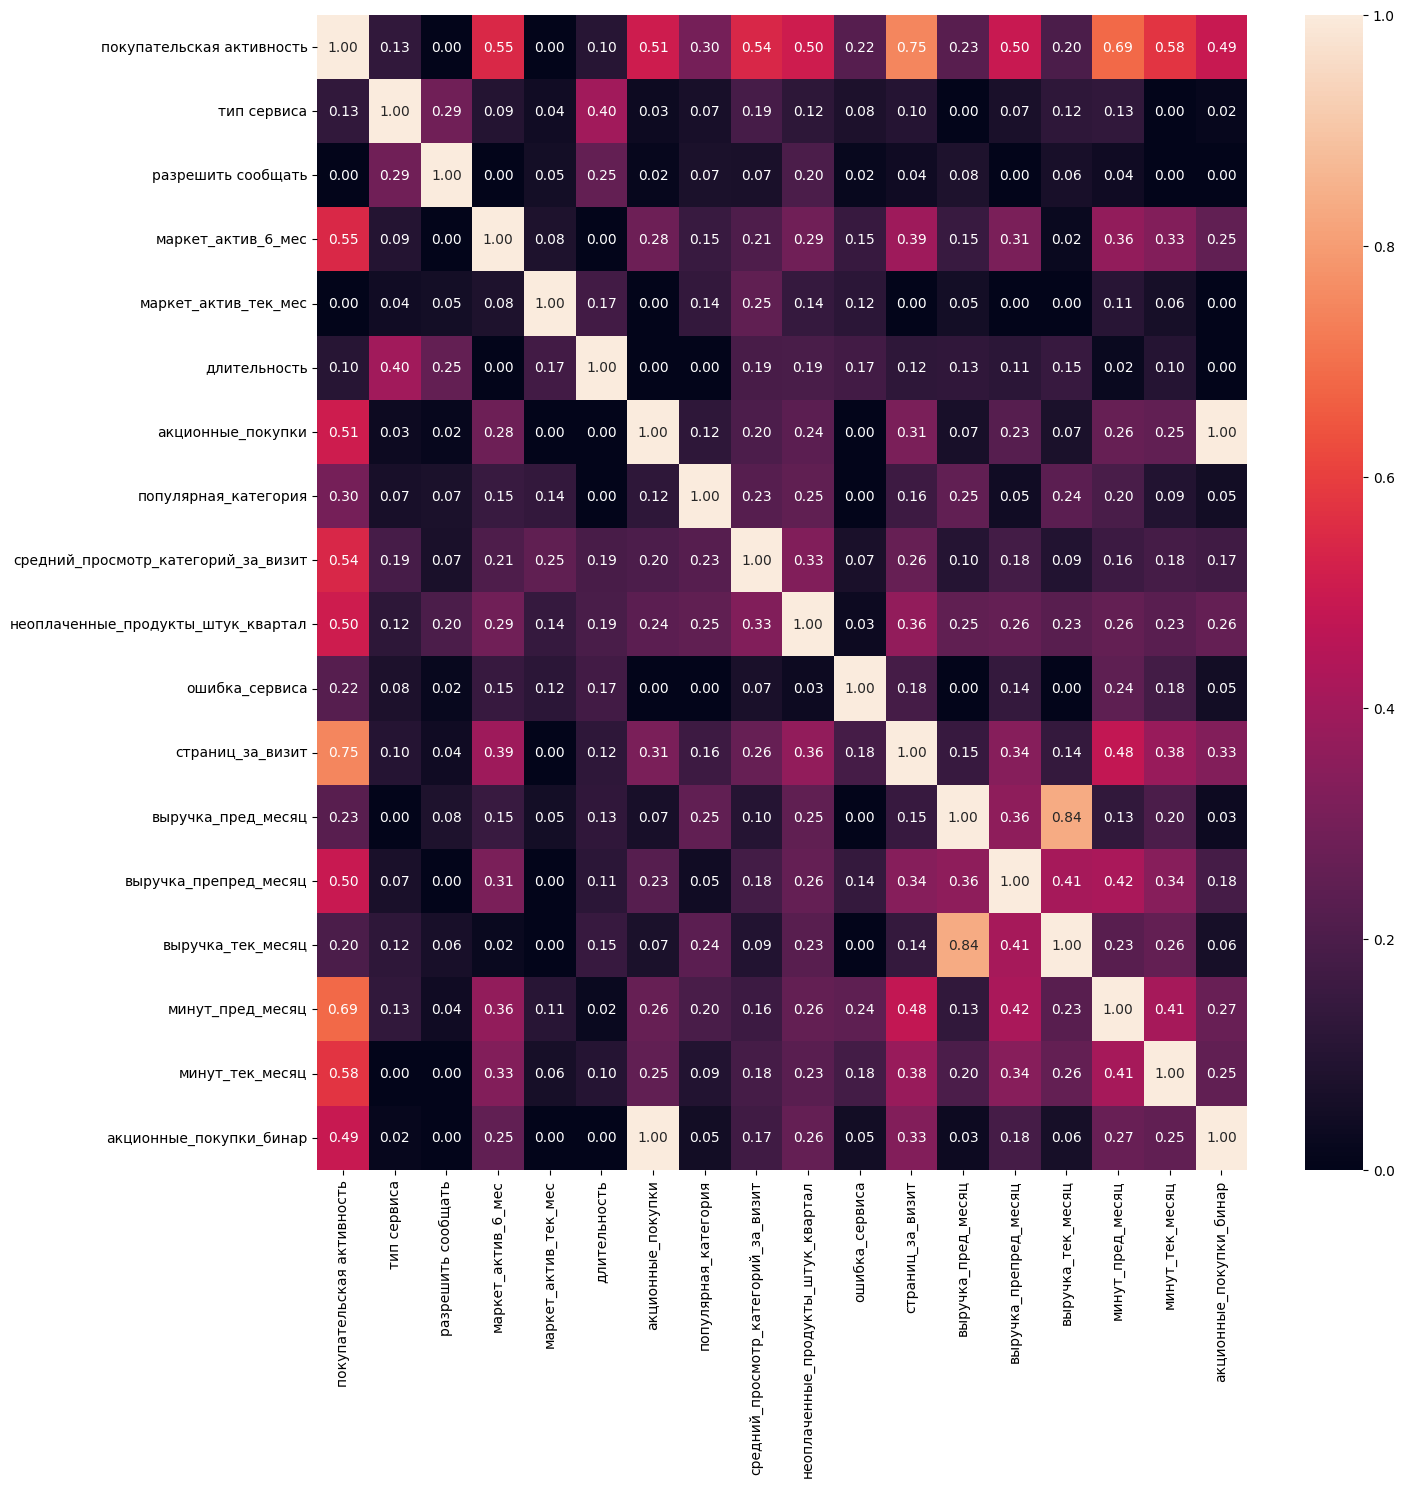

In [5878]:
matrix_corr= phik_matrix(df.drop('id', axis = 1), interval_cols = interval_cols);
fig, ax = plt.subplots(figsize = (15, 15));
sns.heatmap(matrix_corr, annot = True, fmt='.2f');

- Мультиколлинеарностью считается корреляция между признаками больше чем 0.9. В матрице корреляций таких значений нет, значит, мультиколлинеарность отсутствует
- Средняя корреляция (0.5 - 0.6) с целевым признаком `покупательская активность`наблюдается у признаков `маркет_актив_6_мес`, `акционные_покупки`, `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `выручка_препредмесяц`, `минут_тек_месяц`, `акционные_покупки_бинар`
- Высокая корреляция (0.7 - 0.75) присутствует у признаков `страниц_за_визит`, а также `минут_пред_месяц`
- В обучении модели воспользуемся категориальным признаком `акционные_покупки_бинар` вместо `акционные_покупки`

# Шаг 6. Использование пайплайнов

## 6.1 Создание пайплайна

In [5879]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [5880]:
# Для целевого признака значениям "Снизилась" присвоим "1", а значениям "Прежний уровень" - "0"
df['покупательская активность_бинар'] = df['покупательская активность'].apply(lambda x : 1 if x == 'Снизилась' else 0)
df['покупательская активность_бинар'].unique()

array([1, 0], dtype=int64)

- В качестве порядковых данных (для кодировщика OrdinalEncoder) используем столбцы `акционные_покупки_бинар`, `тип_сервиса`

In [5881]:
# Объявление категориальных и количественных признаков
ohe_columns = [
               'разрешить сообщать',
               'популярная_категория'
              ]

ord_columns = [
               'акционные_покупки_бинар',
               'тип сервиса'
              ]

num_columns = [
               'маркет_актив_6_мес',
               'маркет_актив_тек_мес',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'страниц_за_визит',
               'выручка_препред_месяц',
               'выручка_пред_месяц',
               'выручка_тек_месяц',
               'минут_пред_месяц',
               'минут_тек_месяц',
               'длительность',
               'ошибка_сервиса'
              ]

- На этапе исследовательского анализа данных была построена круговая диаграмма признака `покупательская активность`. Там видно, что варианты `Прежний уровень` и `Снизилась` распределены неравномерно (61% против 39%), что может привести к дисбалансу, поэтому применим стратификацию при делении датасета на выборки

In [5882]:
# Деление данных на выборки
X = df.drop(['покупательская активность_бинар', 'id', 'покупательская активность', 'акционные_покупки'], axis = 1)
y = df['покупательская активность_бинар']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE, stratify = y)

- Несмотря на то что в данных отсутствуют пропуски, используем в блоке `ohe_pipe` SimpleImputer

In [5883]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer',
             SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
        ),
        (
            'ohe',
             OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False)
        )
    ]
)

In [5884]:
# SimpleImputer + ORD + SimpleImputer
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories = [
                    [0, 1],
                    ['стандарт', 'премиум']
                ],
                handle_unknown = 'use_encoded_value', unknown_value = np.nan
            )
                    
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
        )                
    ]       
)

In [5885]:
# Пайплайн для кодирования и масштабирования данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ],
    remainder = 'passthrough'
)

## 6.2 Обучение моделей

In [5886]:
# Словарь для RandomimzedSearchCV
param_distributions = [
            {
                 # Описание KNeighborsClassifier
                'models' : [KNeighborsClassifier()],
                'models__n_neighbors' : range(4, 8),
                'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler()]
            },
            {
                # Описание DecisionTreeClassifier
                'models' : [DecisionTreeClassifier(random_state = RANDOM_STATE)],
                'models__max_depth' : range(5, 11),
                'models__min_samples_split' : range(5, 11),
                'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler()]
            },
            {
                # Описание LogisticRegression
                'models' : [LogisticRegression(
                                                random_state = RANDOM_STATE,
                                                solver = 'liblinear',
                                                penalty = 'l1'
                                              )
                           ],
                'models__C' : [0.1, 1, 10],
                'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler()]
            },
            {
                # Описание SVC
                'models' : [SVC(random_state = RANDOM_STATE, probability = True)],
                'models__kernel' : ['rbf', 'sigmoid'],
                'models__C' : [0.1, 1, 10],
                'preprocessor__num' : [StandardScaler(), MinMaxScaler(), RobustScaler()]
            }
]

In [5887]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state = RANDOM_STATE)) 
])

- Оценить модель можно при помощи метрик `recall` и `roc-auc`.
- `Recall` хорошо оценивает модель с точки зрения бизнес - задачи этого проекта, так как необходимо удержать клиентов со снижающейся покупательской активностью, но при этом не учитывает остальные параметры модели и её качество. С этой задачей лучше справится метрика `roc-auc`, так как она базируется на метриках TPR(та же самая recall) и FPR. Таким образом, `roc - auc` позволяет учесть и требования бизнес - задачи и оценить качество модели в целом

In [5888]:
# Обучим и найдём лучшую модель при помощи инструмента автоматизированного поиска RandomizedSearchCV
randomized_search = RandomizedSearchCV(
                        pipe_final,
                        param_distributions = param_distributions,
                        cv = 5,
                        scoring = 'roc_auc',
                        random_state = RANDOM_STATE,
                        n_jobs = -1
                    )
randomized_search.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                     

In [5889]:
print('Метрика лучшей модели на тренировочной выборке:', round((randomized_search.best_score_), 3))
y_pred = randomized_search.predict_proba(X_test)[:, 1]
y_pred_bin = randomized_search.predict(X_test)
print('Значение метрики на тестовых данных:', round(roc_auc_score(y_test, y_pred), 3))
best_model = randomized_search.best_estimator_

Метрика лучшей модели на тренировочной выборке: 0.898
Значение метрики на тестовых данных: 0.927


- Комментарии по выбору параметров моделей:
    + KNeighborsClassifier: для этой модели был выбран единственный гиперпараметр, а именно `n_neighbors`, изменяющий в пределах от 4 до 7 включительно. Этот промежуток был выбран исходя из того, что модель не должна переобучиться(максимальное значение - 7), но при этом не слишком низкое значение, чтобы модель не классифицировала целевой признак только по одному или двум ближайшим соседям
    + DecisionTreeClassifier: в данной модели использовалось 2 гиперпараметра `max_depth` и `min_samples_split`. `max_depth` не выбирал слишком большим, чтобы не возникло переобучения, а также `min_samples_split` выбрал более 5, чтобы модель не приспосабливалась к тренировочным данным
    + LogisticRegression: для данной модели машинного обучения в первую очередь настроил регуляризацию и выбрал "лассо - регуляризацию", так как входных признаков много и не факт, что они будут принимать значимый вклад в принятии решений, поэтому некоторые из них лучше убрать(тем более по матрице корреляций было видно, что присутствует достаточное число признаков, корреляция которых с целевым менее 0.2), чем просто снижать их влияние на итоговое решение(если это была бы "ридж-регуляризация"). Также назначил в широком диапазоне коэффициент С(штраф за переобучение)
    + SVC : здесь выбрал два ядра, а именно `sigmoid`, `rbf`. А также назначил коэффициент C в таком же диапазоне, что и у логистической регрессии

## 6.3 Выбор модели

- Для выбора лучшей модели было принято решение использовать стратегию общего пайплайна со всеми четырьмя моделями
- Лучшей моделью оказалась логистическая регрессия с L1 - регуляризацией и значением С = 1
- Значение метрики `roc-auc` высокое как на тренировочной (0.898), так и на тестовой выборках (0.927)

# Шаг 7. Анализ важности признаков

## 7.1 Оценка важности признаков лучшей модели

- Оценим важность признаков лучшей модели и построим график важности при помощи метода `shap`

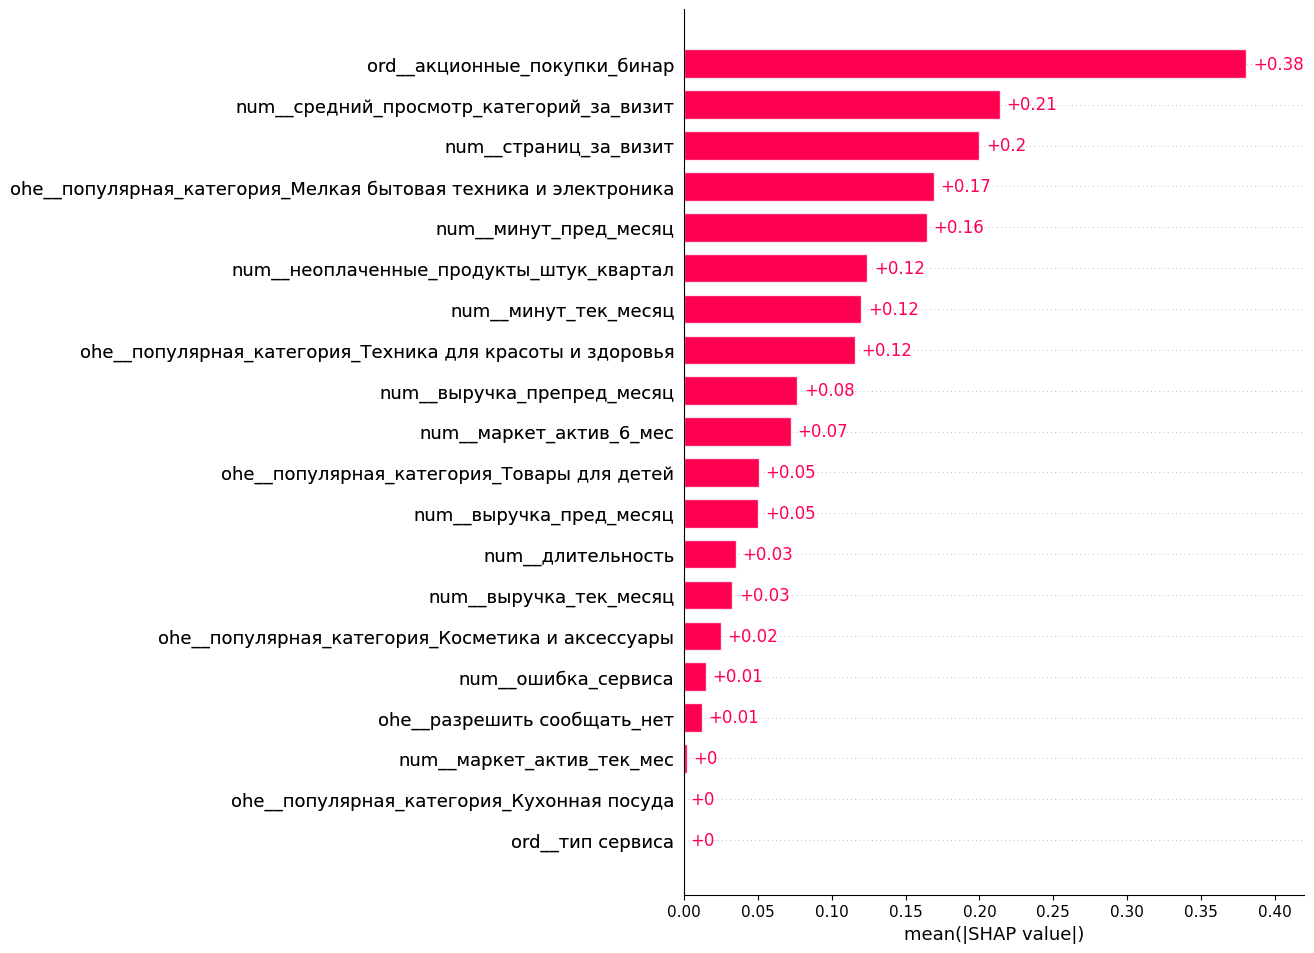

None

In [5890]:
X_train_new = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_new)
X_test_new = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_new = pd.DataFrame(X_test_new, columns=feature_names)
shap_values = explainer(X_test_new)

display(shap.plots.bar(shap_values, max_display=30));


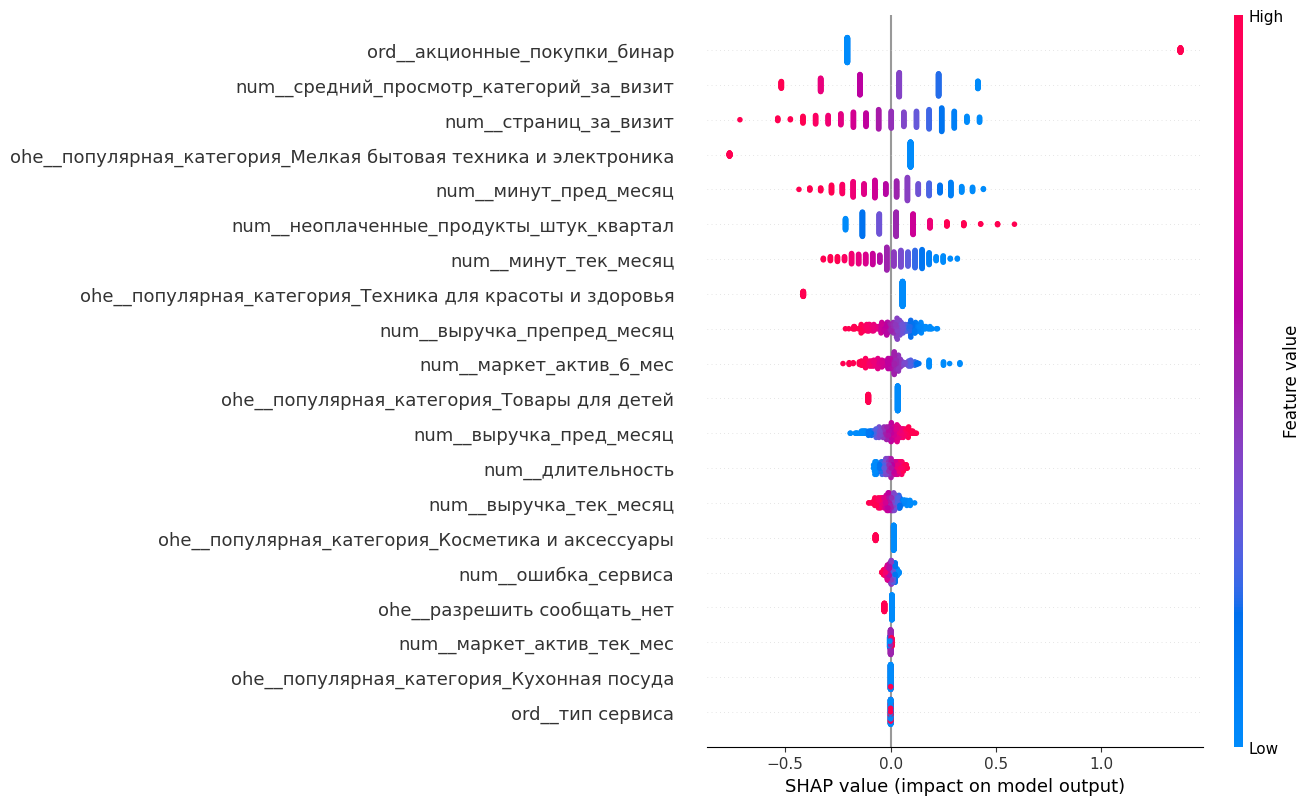

None

In [5891]:
display(shap.plots.beeswarm(shap_values, max_display=30));

## 7.2 Выводы о значимости признаков

- По результатам построенной диаграммы shap можно заключить:
    + Признаки `акционные_покупки_бинар`, `средний_просмотр_категорий_за_визит`, `страниц_за_визит` сильнее всего влияют на принятие решение моделью
    + Признаки `минут_тек_месяц`, `минут_пред_месяц`, `выручка_препред_месяц`, `неоплаченные_продукты_штук_квартал`, а также `популярная_категория`(но не все, а лишь некоторые её значения - `Мелкая бытовая_техника_и_электроника`, `Техника для красоты и здоровья`) оказывают среднее влияние на целевой признак
    + `длительность`, `выручка_тек_месяц`, `выручка_пред_месяц` - низкий уровень влияния
    +  `ошибка_сервиса`, `разрешить сообщать`, `тип_сервиса`, `маркет_актив_тек_мес` вовсе не влияют на целевой признак
- При моделировании нужно сделать акцент на формировании акций. Из графика shap следует, что клиенты, чья покупательская активность снизилась, покупают значительную, даже большую часть товаров по акции (более 50%). Вероятно акции на товары, которые их интересуют, пропали, и следует проанализировать, какие категории их интересуют, чтобы удержать их в сервисе
- График также демонстрирует тот факт, что покупательская активность людей, которые просматривают сравнительно меньше категорий и страниц за визит, снижается. Т.е. следует обратить внимание на эти особенности поведения пользователей при моделировании, а также подумать о том, какие методы можно применить, чтобы заинтересовать пользователей больше времени провести на сайте
- У пользователей, популярными категориями которых являются бытовая техника и электроника или техника для красоты и здоровья, покупательская активность снижается. Это может объясняться тем, что данный вид товаров покупается на длинный срок, и в таком случае возвращение пользоателей на сайт ничем не стимулируется, если их интересуют только указанные выше категории. Таким образом, решением проблемы сниженияпокупательской активности для этого сегмента клиентов может быть предложение различного рода расходных материалов, аксессуаров для соответствующей техники
- Существенную роль на покупательскую активность оказывает число неоплаченных товаров. Чем больше неоплаченных товаров, тем больше вероятность того, что покупательская активность клиентов снизиться. Поэтому можно предлагать акции на выбранные товары в случаях когда это выгодно, тем самым повышая интерес пользователей и мотивацию к покупке

# Шаг 8. Сегментация покупателей

## 8.1 Сегментация покупателей

- Выделим сегмент людей, которые покупают большую часть товаров по акции

In [5892]:
def scatterplot_build(df, quant_attribute, target, cat_attribute):
    plt.figure(figsize = (10, 10));
    sns.scatterplot(data = df, x = quant_attribute, y = target, style = cat_attribute, hue = cat_attribute)
    plt.xlabel(quant_attribute);
    plt.ylabel(target);
    ax.legend(
    bbox_to_anchor = (1.0, 1.0),
    loc = 'upper left', labels = df[cat_attribute])

In [5893]:
df_segm = df.loc[df['акционные_покупки_бинар'] == 1]
df_segm.head()
df_segm.shape

(168, 20)

In [5894]:
df_segm.insert(20,'вероятность_снижения', 1, True)
df_segm.loc[:,'вероятность_снижения'] = randomized_search.best_estimator_.predict_proba(df_segm)[:, 1]

In [5895]:
df_segm.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,...,ошибка_сервиса,страниц_за_визит,выручка_пред_месяц,выручка_препред_месяц,выручка_тек_месяц,минут_пред_месяц,минут_тек_месяц,акционные_покупки_бинар,покупательская активность_бинар,вероятность_снижения
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,2,5,5216.0,4472.0,4971.6,12,10,1,1,0.930466
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,6,4,6158.0,4793.0,6610.4,11,13,1,1,0.769338
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,3,2,5807.5,4594.0,5872.5,8,11,1,1,0.962170
11,215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,...,6,4,4314.0,4765.0,4447.9,13,13,1,1,0.904009
13,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,...,3,3,5795.5,4942.0,5484.8,11,9,1,1,0.961141


In [5896]:
df_segm = df_segm.merge(money_df, on = 'id', how = 'left')

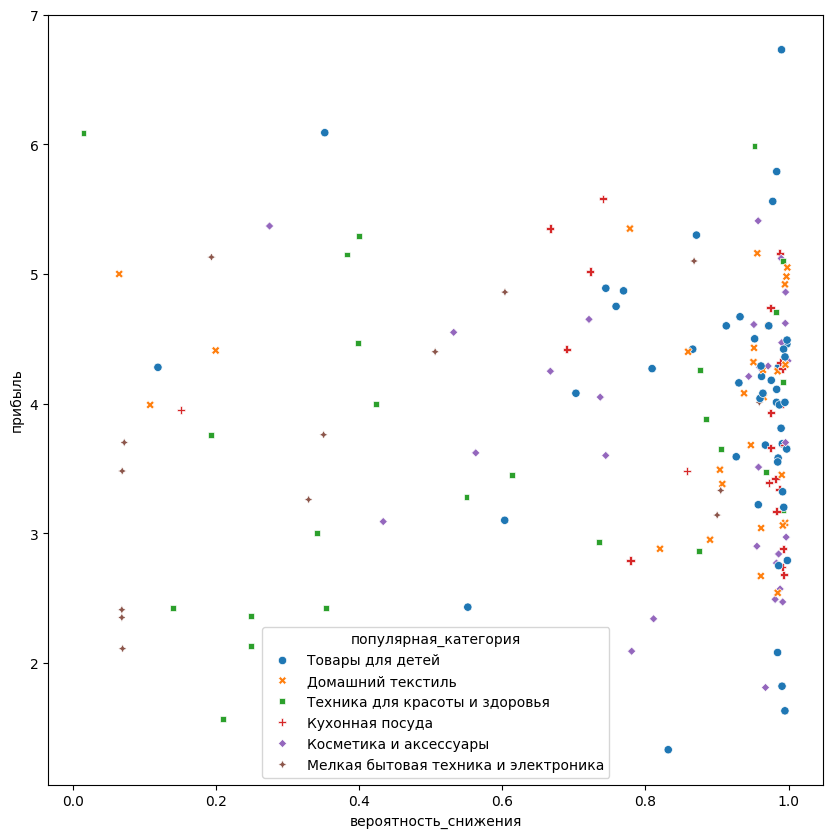

In [5897]:
scatterplot_build(df_segm, 'вероятность_снижения', 'прибыль', 'популярная_категория')

## 8.2  Графическое и аналитическое исследование выбранного сегмента

- Рассматривая диаграмму рассеяния, обратим внимание на покупателей, покупательская активность которых с вероятностью более чем 0.8 снизится. Эту группу будем считать с потенциально снижающейся покупательской активностью

In [5898]:
(
print("Доля покупателей с высокой вероятностью снижения покупательской активности среди людей с высоким уровнем покупок по акции составляет:",
round(df_segm.loc[df_segm['вероятность_снижения'] >= 0.8].shape[0] / df_segm.shape[0], 3))
)

Доля покупателей с высокой вероятностью снижения покупательской активности среди людей с высоким уровнем покупок по акции составляет: 0.69


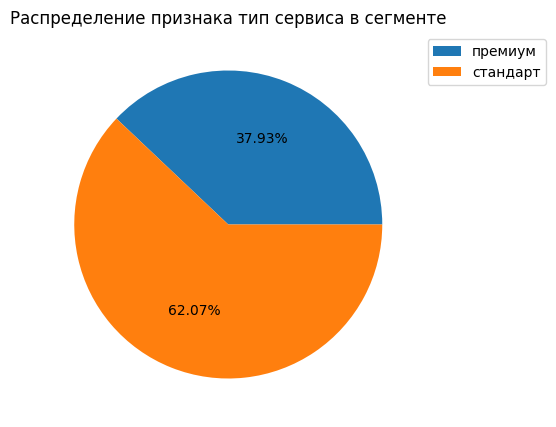

In [5899]:
df_segm = df_segm.loc[df_segm['вероятность_снижения'] >= 0.8]
fig, ax  = plt.subplots(figsize = (5, 5))
pie_build_one(df_segm, 'тип сервиса', 'id', 'Распределение признака тип сервиса в сегменте')

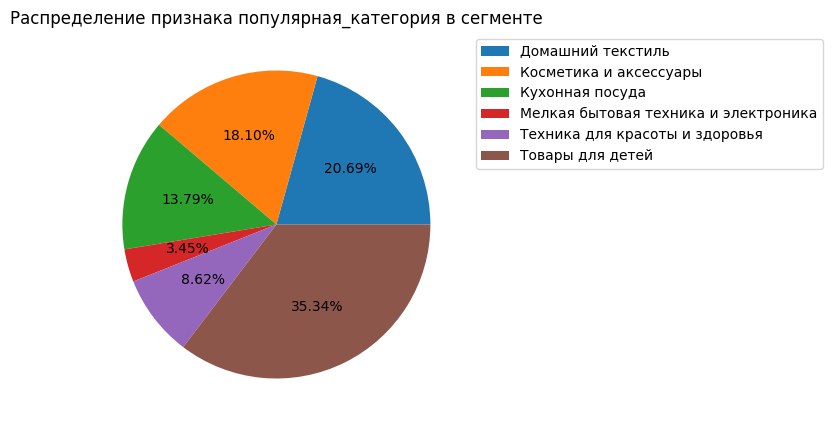

In [5900]:
fig, ax  = plt.subplots(figsize = (5, 5))
pie_build_one(df_segm, 'популярная_категория', 'id', 'Распределение признака популярная_категория в сегменте')

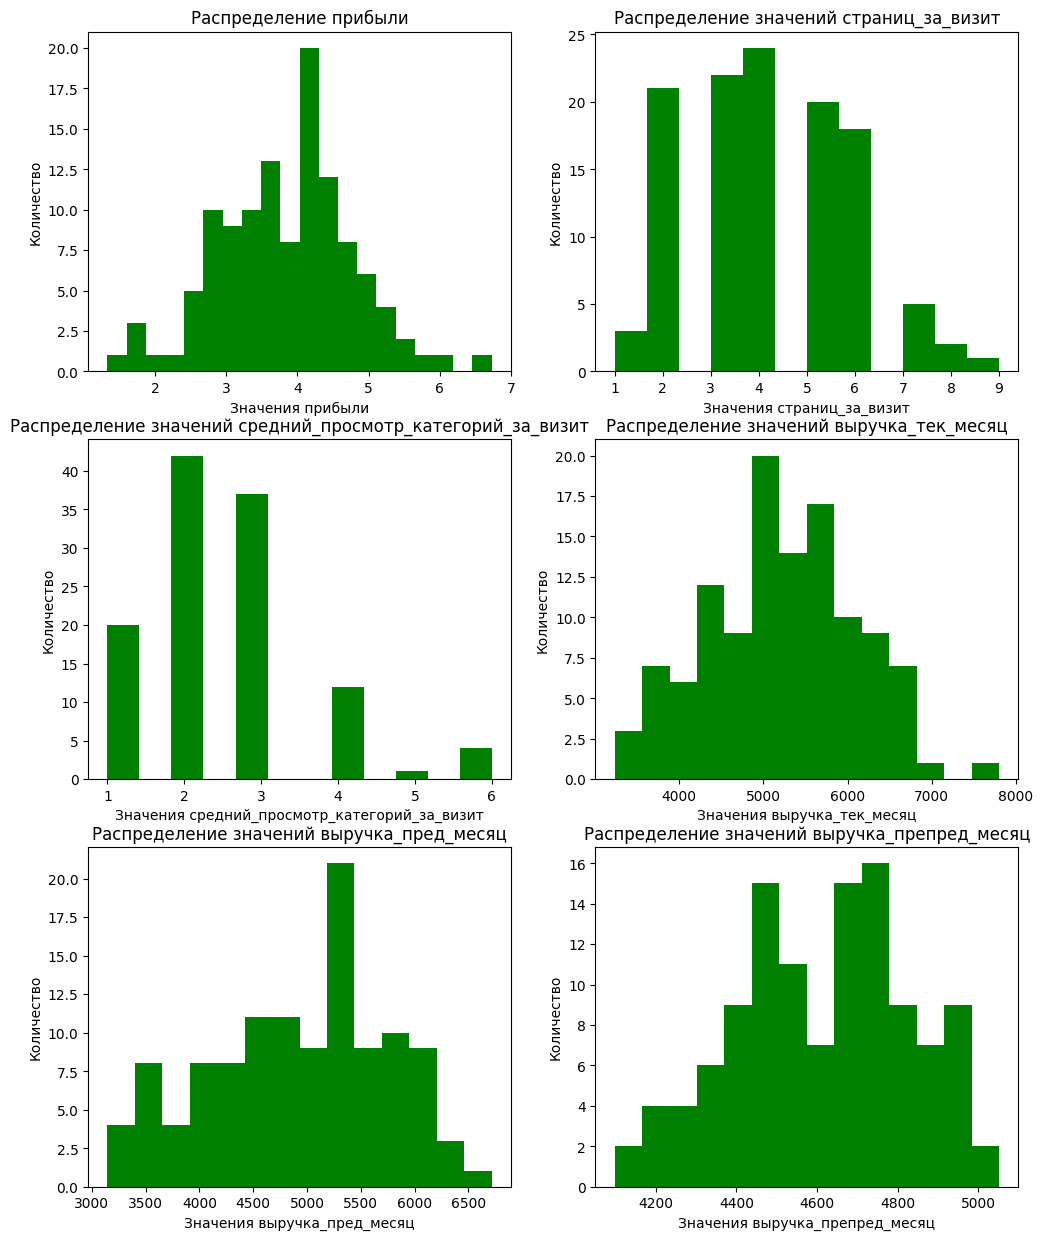

In [5901]:
fig, axes  = plt.subplots(ncols = 2, nrows = 3, figsize = (12, 15))
hist_build(money_df[money_df['id'].isin(df_segm['id'])],
                                        'прибыль',
                                        'green',
                                        'Значения прибыли',
                                        'Количество',
                                        'Распределение прибыли',
                                         0, 
                                         0,
                                         20,
                                         True
                                          )
hist_build(df_segm,
           'страниц_за_визит',
           'green',
           'Значения страниц_за_визит',
           'Количество',
           'Распределение значений страниц_за_визит',
            0, 
            1,
            12,
            True
            )
hist_build(df_segm,
           'средний_просмотр_категорий_за_визит',
           'green',
           'Значения средний_просмотр_категорий_за_визит',
           'Количество',
           'Распределение значений средний_просмотр_категорий_за_визит',
            1, 
            0,
            12,
            True
            )
hist_build(df_segm,
           'выручка_тек_месяц',
           'green',
           'Значения выручка_тек_месяц',
           'Количество',
           'Распределение значений выручка_тек_месяц',
            1, 
            1,
            14,
            True
            )
hist_build(df_segm,
           'выручка_пред_месяц',
           'green',
           'Значения выручка_пред_месяц',
           'Количество',
           'Распределение значений выручка_пред_месяц',
            2, 
            0,
            14,
            True
            )
hist_build(df_segm,
           'выручка_препред_месяц',
           'green',
           'Значения выручка_препред_месяц',
           'Количество',
           'Распределение значений выручка_препред_месяц',
            2, 
            1,
            14,
            True
            )

- Выберем из указанного сегмента группу людей, которые в среднем просматривают от 1 до 3 категорий. Построим для этой группы аналогичные графики

In [5902]:
df_segm_group = df_segm.loc[df_segm['средний_просмотр_категорий_за_визит'] <= 3]
df_segm_group.shape

(99, 22)

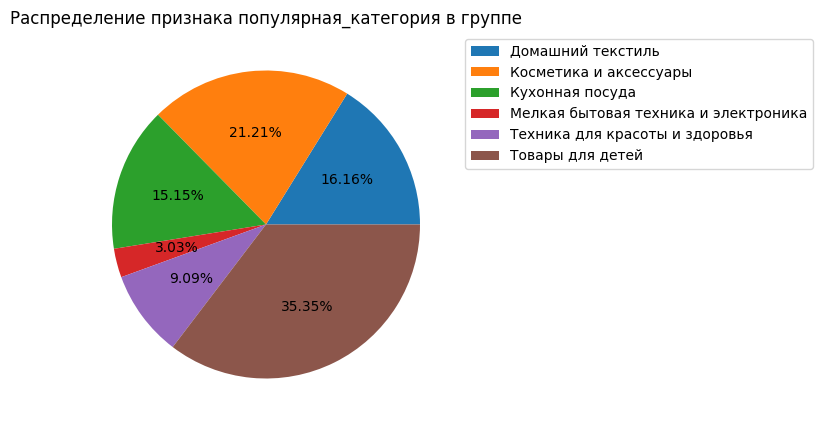

In [5903]:
fig, ax  = plt.subplots(figsize = (5, 5))
pie_build_one(df_segm_group, 'популярная_категория', 'id', 'Распределение признака популярная_категория в группе')

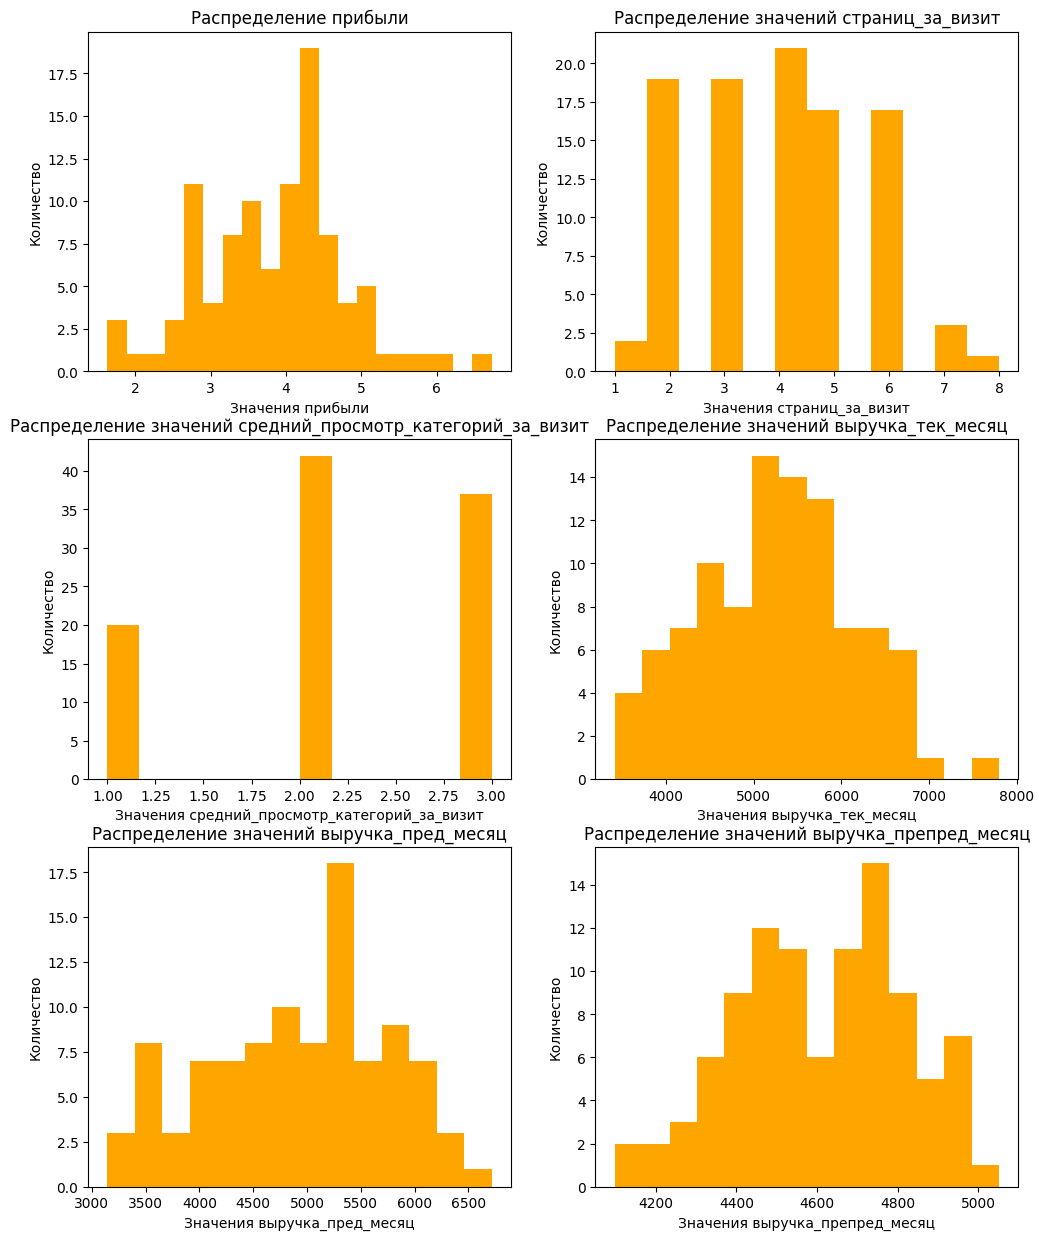

In [5904]:
fig, axes  = plt.subplots(ncols = 2, nrows = 3, figsize = (12, 15))
hist_build(money_df[money_df['id'].isin(df_segm_group['id'])],
                                        'прибыль',
                                        'orange',
                                        'Значения прибыли',
                                        'Количество',
                                        'Распределение прибыли',
                                         0, 
                                         0,
                                         20,
                                         True
                                          )
hist_build(df_segm_group,
           'страниц_за_визит',
           'orange',
           'Значения страниц_за_визит',
           'Количество',
           'Распределение значений страниц_за_визит',
            0, 
            1,
            12,
            True
            )
hist_build(df_segm_group,
           'средний_просмотр_категорий_за_визит',
           'orange',
           'Значения средний_просмотр_категорий_за_визит',
           'Количество',
           'Распределение значений средний_просмотр_категорий_за_визит',
            1, 
            0,
            12,
            True
            )
hist_build(df_segm_group,
           'выручка_тек_месяц',
           'orange',
           'Значения выручка_тек_месяц',
           'Количество',
           'Распределение значений выручка_тек_месяц',
            1, 
            1,
            14,
            True
            )
hist_build(df_segm_group,
           'выручка_пред_месяц',
           'orange',
           'Значения выручка_пред_месяц',
           'Количество',
           'Распределение значений выручка_пред_месяц',
            2, 
            0,
            14,
            True
            )
hist_build(df_segm_group,
           'выручка_препред_месяц',
           'orange',
           'Значения выручка_препред_месяц',
           'Количество',
           'Распределение значений выручка_препред_месяц',
            2, 
            1,
            14,
            True
            )

- Предложения для покупателей данного сегмента:
  + 1. Так как данные покупатели заинтересованы в акциях и при этом более 70% популярных категорий составляют недолгосрочные товары (`Домашний текстиль`, `Косметика и аксессуары`, `Товары для детей`), то можно их заинтересовать предложениями в указанных категориях. В указанном сегменте была выбрана группа людей, которые просматривают в среднем от 1 до 3 категорий. Для них вышеуказанное предложение будет актуально 
  + 2. На гистограммах выручки по месяцам присутствуют разные пределы распределения. В препредыдущий месяц диапазон от 4200 до 5100, в предыдущий - от 3200 до 6500, в текущий месяц - от 3500 до 7000. Данное поведение может свидетельствовать о какой - то периодичности покупок на значительную сумму в месяц. К примеру, купленный товар закончился и покупатель вернулся через 2 - 3 месяца, чтобы вновь совершить покупку в этой категории. Не исключено, что рост выручки может быть вызван праздником или другими факторами, которые искажают обычный расклад. Это тоже нужно учитывать при формировании акций и предложений. 

## 8.3 Выводы о сегментах

- Для дополнительного исследования был выбран сегмент покупателей, чья покупательская активность снизилась и которые покупают в основном товары по акции
- Для этих покупателей было предложено сформировать акции по интересующим их категориям(`Домашний текстиль`, `Косметика и аксессуары`, `Товары для детей`), а также предлагать их через определённый период, когда покупатель потенциально вернётся, чтобы снова купить определённый товар 

# Шаг 9. Общий вывод

- Описание задачи:
    + 1. Разработать модель, которая будет предсказывать снижение покупательской активности пользователей
    + 2. Выделить сегмент покупателей и сформировать предложения, которые повысят покупательскую активность выбранного сегмента пользователей
- Описание исходных данных и предобработка:
    + 1. Исходные данные для работы были даны в 4 - х датасетах (`market_file_df`, `market_money_df`, `market_time_df, money_df`). Основная информация содержится в датасете `market_file_df`, подробности о выручке по месяцам, проведённом времени на сайте по месяцам и прибыли, которую, покупатели принесли компании дана в `датасетах market_money_df`, `market_time_df`, `money_df` соответственно. Более подробное описание признаков каждого из датасетов дано в описании к проекту.
    + 2. На этапе предобработки были приведены к нижнему регистру названия столбцов, исправлены типы данных, где это необходимо. При поиске явных и неявных дубликатов ничего найдено не было - данные достаточно чистые.
- Поиск лучшей модели:
    + При поиске лучшей модели было рассмотрено 4 модели машинного обучения - `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression`, `SVC`. Для каждой из этих моделей были подобраны гиперпараметры, чтобы повысить точность их предсказаний. Также было выбрано 2 кодировщика для категориальных данных - `OneHotEncoder`, `OrdinalEncoder`, а для масштабирования количественных данных - `Scaler`, `MinMaxScaler`, `RobustScaler`.
- Лучшая модель:
    + Лучшей моделью оказалась `логистическая регрессия` со скейлером `MinMaxScaler` с гиперпараметром С = 1, лассо - регуляризацией(L1 - регуляризацией) и solverом "liblinear"
    + Метрика `ROC - AUC` на тренировочных данных оказалась равной `0.898`, а на тестовых - `0.894`, что является достаточно хорошим результатом
- Выводы и дополнительные предложения для выбранного сегмента покупателей:
    + Сегмент покупателей, которые покупают преимущественно товары по акции и чья покупательская активность снизилась. Среди указанного сегмента была выбрана группа, просматривающая в среднем от 1 до 3 категорий.
    + Данный сегмент был выбран по той причине, что он наиболее крупный по сравнению с остальными, т.е. предложения позволят удержать больше клиентов при прочих равных условиях. Более того, предложения для данного сегмента в принципе легко сформулировать. Требовалось только выявить особенности поведения покупателей
    + По результатам аналитической и графической работы было принято решение сформировать акции в категориях `Домашний текстиль`, `Косметика и аксессуары`, `Товары для детей`, так как в сумме популярность этих категорий среди покупателей указанного сегмента составляет долю более чем в 70%. Также необходимо обратить внимание на периодичность покупок товаров клиентами. Формировать предложения с периодичностью в 2 - 3 месяца, чтобы поход покупателей в магазин совпадал с акциями, но здесь, безусловно, нужен индивидуальный подход.